In [ ]:
!pip install numpy scipy pydub networkx matplotlib powerlaw
import numpy as np
from scipy.fft import fft
from scipy.io import wavfile
from pydub import AudioSegment
import networkx as nx
import os
import matplotlib.pyplot as plt

def midi_note_to_name(midi_note):
    # Define the note names in an octave, including sharps
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

    # Calculate the note name and octave
    note_name = notes[midi_note % 12]
    octave = abs((midi_note // 12) - 1)  # MIDI notes start at octave -1 for note number 0

    return f'{note_name}{octave}'

def frequency_to_midi(f):
    # Ensure frequency is above 0 to avoid taking the log of a non-positive number
    if f <= 0:
        return None
    # Convert frequency to MIDI note number

    midi_num = int(69 + 12 * np.log2(f / 440.0))

    return midi_note_to_name(midi_num)

def process_audio(mp3_file_path, base_dir):
    base_name = os.path.basename(mp3_file_path).split('.')[0]
    wav_dir = os.path.join('../temp_wavefile', base_dir)
    os.makedirs(wav_dir, exist_ok=True)
    temp_wav_file = os.path.join(wav_dir, f'temp_{base_name}.wav')

    audio = AudioSegment.from_mp3(mp3_file_path)
    audio.export(temp_wav_file, format="wav")
    print(f"Processing file: {mp3_file_path}")

    sr, y = wavfile.read(temp_wav_file)
    if y.ndim > 1:
        y = np.mean(y, axis=1)

    sample_size = 10000
    num_samples = len(y) // sample_size
    print(f"Number of samples: {num_samples}")

    # Initialize an empty graph
    G = nx.Graph()

    # Process each sample
    for i in range(num_samples):
        start_sample = i * sample_size
        end_sample = start_sample + sample_size
        y_sample = y[start_sample:end_sample]

        n = len(y_sample)
        yf = fft(y_sample)
        xf = np.fft.fftfreq(n, 1 / sr)

        # Find the peak frequencies in each bin, convert to MIDI note
        sample_notes = [frequency_to_midi(freq) for freq in xf[np.argsort(np.abs(yf))[-5:]] if freq > 0]  # select top 5 peaks

        # Add nodes and edges to the graph for this sample
        for idx, note in enumerate(sample_notes):
            # Skip if this note couldn't be converted to MIDI (e.g., frequency was <= 0)
            if note is None:
                continue

            # Add the node if it's not already in the graph
            if not G.has_node(note):
                G.add_node(note, label=note)

            # Connect the node to subsequent nodes
            for next_note in sample_notes[idx + 1:]:
                if G.has_edge(note, next_note):
                    # If the edge exists, increment its weight
                    G[note][next_note]['weight'] += 1
                else:
                    # Otherwise, add the edge with weight 1
                    G.add_edge(note, next_note, weight=1)

    return G


In [ ]:
mp3_1 = '/content/01.  AL!AS  -  You (Original Mix).mp3'
G1 = process_audio(mp3_1, 'EDM')
mp3_2= '/content/06.  DeadRomeo  -  UnHoly (Original Mix).mp3'
G2 = process_audio(mp3_2, 'Rock')
mp3_3 = '/content/18.  Bo Biz  -  BAMF Surprise (Original Mix).mp3'
G3 = process_audio(mp3_3, 'EDM')
mp3_4 = '/content/21.  Solarcube  -  We Never Die (Original Mix).mp3'
G4 = process_audio(mp3_4, 'EDM')
mp3_5 = '/content/44.  Digital Tribe  -  Sweet Dreams (Original Mix).mp3'
G5 = process_audio(mp3_5, 'EDM')
mp3_6 = '/content/57.  Phenotype  -  Super Fly (Original Mix).mp3'
G6 = process_audio(mp3_6, 'EDM')
mp3_7 = '/content/66.  Nostromosis  -  Old ROM (Original Mix).mp3'
G7 = process_audio(mp3_7, 'EDM')
mp3_8 = '/content/78.  Psyfactor  -  Just Chaos (Original Mix).mp3'
G8 = process_audio(mp3_8, 'EDM')
mp3_9 = '/content/98.  Dusha  -  Aurora (Original Mix).mp3'
G9 = process_audio(mp3_9, 'EDM')



Processing file: /content/01.  AL!AS  -  You (Original Mix).mp3
Number of samples: 794
Processing file: /content/06.  DeadRomeo  -  UnHoly (Original Mix).mp3
Number of samples: 1257
Processing file: /content/18.  Bo Biz  -  BAMF Surprise (Original Mix).mp3
Number of samples: 1047
Processing file: /content/21.  Solarcube  -  We Never Die (Original Mix).mp3
Number of samples: 1784
Processing file: /content/44.  Digital Tribe  -  Sweet Dreams (Original Mix).mp3
Number of samples: 2076
Processing file: /content/57.  Phenotype  -  Super Fly (Original Mix).mp3
Number of samples: 2425
Processing file: /content/66.  Nostromosis  -  Old ROM (Original Mix).mp3
Number of samples: 2216
Processing file: /content/78.  Psyfactor  -  Just Chaos (Original Mix).mp3
Number of samples: 1913
Processing file: /content/98.  Dusha  -  Aurora (Original Mix).mp3
Number of samples: 1164


In [ ]:
#COUNT NODES
print("Number of nodes:", G1.number_of_nodes())

Number of nodes: 54


In [ ]:
#COUNT NODES
print("Number of nodes:", G2.number_of_nodes())

Number of nodes: 68


In [ ]:
#COUNT NODES
print("Number of nodes:", G3.number_of_nodes())

Number of nodes: 72


In [ ]:
#COUNT NODES
print("Number of nodes:", G4.number_of_nodes())

Number of nodes: 56


In [ ]:
#COUNT NODES
print("Number of nodes:", G5.number_of_nodes())

Number of nodes: 77


In [ ]:
#COUNT NODES
print("Number of nodes:", G6.number_of_nodes())

Number of nodes: 81


In [ ]:
#COUNT NODES
print("Number of nodes:", G7.number_of_nodes())

Number of nodes: 57


In [ ]:
#COUNT NODES
print("Number of nodes:", G8.number_of_nodes())

Number of nodes: 63


In [ ]:
#COUNT NODES
print("Number of nodes:", G9.number_of_nodes())

Number of nodes: 60


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def analyze_graph(graph):
    # Clustering Coefficient
    clustering_coefficient = nx.average_clustering(graph)
    print("Average Clustering Coefficient:", clustering_coefficient)

    # Degree Distribution
    degrees = [degree for node, degree in graph.degree()]
    degree_distribution = {degree: degrees.count(degree) for degree in set(degrees)}
    print("Degree Distribution:", degree_distribution)

    # Weighted Degree Distribution
    weighted_degrees = {node: graph.degree(node, weight='weight') for node in graph.nodes()}
    print("Weighted Degree Distribution:", weighted_degrees)

    # Plotting the unweighted degree distribution
    max_degree = max(degree_distribution.keys())
    complete_degree_distribution = {degree: degree_distribution.get(degree, 0) for degree in range(max_degree + 1)}
    plt.figure(figsize=(10, 5))
    plt.bar(complete_degree_distribution.keys(), complete_degree_distribution.values())
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

    # Plotting the weighted degree distribution
    plt.figure(figsize=(10, 5))
    nodes = list(weighted_degrees.keys())
    weights = list(weighted_degrees.values())
    plt.bar(nodes, weights, color='teal')
    plt.title("Weighted Degree Distribution")
    plt.xlabel("Nodes")
    plt.ylabel("Weighted Degree")
    plt.xticks(rotation=90)  # Rotate node labels for better visibility
    plt.show()

    # Centrality Measures
    degree_centrality = nx.degree_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    eigen_centrality = nx.eigenvector_centrality(graph)

    # Sort the centrality measures in decreasing order
    sorted_degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}
    sorted_closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
    sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
    sorted_eigen_centrality = {k: v for k, v in sorted(eigen_centrality.items(), key=lambda item: item[1], reverse=True)}

    print("Degree Centrality:", sorted_degree_centrality)
    print("Closeness Centrality:", sorted_closeness_centrality)
    print("Betweenness Centrality:", sorted_betweenness_centrality)
    print("Eigenvector Centrality:", sorted_eigen_centrality)

    # Assortativity
    assortativity_coefficient = nx.degree_assortativity_coefficient(graph)
    print("Assortativity Coefficient:", assortativity_coefficient)

    # Attempt to calculate diameter, network diameter, and average path length
    try:
        network_dia = nx.diameter(graph)
        print("Network Diameter:", network_dia)
        avg_path_length = nx.average_shortest_path_length(graph)
        print("Average Path Length:", avg_path_length)
    except nx.NetworkXError as e:
        print("Network is Disconnected", str(e))

    transitivity = nx.transitivity(graph)
    print("Transitivity:", transitivity)

    # Attempt to identify the largest connected component
    try:
        gcc = max(nx.connected_components(graph), key=len)
        gcc = graph.subgraph(gcc).copy()
        print("Giant Connected Component Size:", gcc.number_of_nodes())
    except ValueError as e:
        print("Error computing GCC:", str(e))



    # Louvain Communities Detection
    louvain_communities = nx.algorithms.community.louvain_communities(graph, weight='weight', resolution=1)

    # Visualizing the communities
    plt.figure(figsize=(10, 10))
    pos = nx.circular_layout(graph)
    community_colors = {node: idx for idx, community in enumerate(louvain_communities) for node in community}
    colors = [community_colors[node] for node in graph.nodes()]
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
    scaled_edge_weights = [weight * 0.1 for weight in edge_weights]  # Scale weight for visibility

    nx.draw_networkx_nodes(graph, pos, node_color=colors, node_size=1000, cmap=plt.cm.viridis)
    nx.draw_networkx_labels(graph, pos, font_size=7, font_weight='bold')
    nx.draw_networkx_edges(graph, pos, width=scaled_edge_weights)

    plt.title('Graph Visualization with Louvain Communities')
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(louvain_communities)-1)),
                 ax=plt.gca(), orientation='horizontal', shrink=0.5, label='Community')
    plt.show()

    # print community
    print("Louvain Communities:", louvain_communities)

In [ ]:
# Print every node with degree distribution
for node in G1.nodes():
    print(node, G1.degree(node))

G4 20
B3 37
D4 17
G3 10
F#3 13
A4 4
A3 17
E4 19
F#4 16
F4 4
C#4 13
C5 6
B4 6
G5 5
G#3 5
D#4 22
C4 15
F#5 7
B1 6
A1 5
F#1 9
G#1 9
F1 8
F#2 15
E2 4
D2 4
D#2 2
C#2 3
C2 6
D#1 5
C#1 8
A2 9
C3 11
B2 12
G#2 9
A#3 19
G#8 13
G8 1
G2 9
F6 5
D#7 6
D5 5
C#5 8
E9 3
E5 6
F2 3
A8 2
D#5 7
C#3 3
C6 4
D6 2
E6 3
F5 2
B0 2


In [ ]:
# Print every node with degree distribution
for node in G2.nodes():
    print(node, G2.degree(node))

D#3 18
F#5 8
F5 6
D3 5
G5 3
C#3 16
B2 14
C3 11
G#5 8
A#5 8
B5 6
A5 3
D5 7
C#5 15
E3 12
D#5 13
E5 6
F#1 8
F1 17
D#1 19
C#1 13
D2 4
B0 10
F0 3
G#0 6
C2 13
E2 15
D#2 8
F#3 12
G3 18
G4 6
G#4 3
G#3 3
A#4 9
A4 3
F3 5
B4 11
C5 8
F#6 14
G6 4
B1 12
A1 13
G#1 15
A2 3
G2 2
A6 3
C#4 3
A#3 12
B3 3
A3 4
F2 2
B8 3
G8 1
C#8 2
G#7 4
D#8 2
A7 2
C#7 2
D#7 3
B6 2
A#6 1
E6 2
D#6 2
C6 2
E4 4
F#4 1
F4 2
A9 2


In [ ]:
# Print every node with degree distribution
for node in G3.nodes():
    print(node, G3.degree(node))

D#1 21
F#1 20
F1 22
B1 11
F#4 29
D#4 21
G4 19
D#6 6
A#5 13
G5 18
D5 11
E5 6
G#5 7
A5 10
B4 26
C#6 5
G#1 20
E3 8
D#3 14
B3 17
F5 6
C6 8
A6 3
G6 7
B2 11
D3 25
F#2 16
C#2 9
D2 8
F#3 8
F3 11
C#1 25
D6 9
A#6 6
B0 28
G#0 13
A1 16
G2 11
G3 15
D#2 12
E2 11
E6 4
F#5 18
C5 10
F2 7
C2 7
C7 5
F4 4
C#5 13
B5 11
C#3 9
C3 21
B6 5
F#6 3
C4 6
F6 5
D#5 10
D4 8
A4 2
G#4 3
A#4 4
G#6 6
F#8 1
A#2 4
C#4 8
G#3 7
G#2 4
F0 4
A2 5
G7 3
A#3 2
A3 1


In [ ]:
# Print every node with degree distribution
for node in G4.nodes():
    print(node, G4.degree(node))

D#3 6
E3 25
F6 4
A5 10
E6 12
B5 6
G#5 9
D#6 9
G6 3
D6 18
C#6 7
G#4 4
C6 3
C5 12
F#6 1
B4 6
F1 22
G#1 17
F#1 19
G#2 29
E2 23
A2 28
F2 17
B2 5
B1 19
D#2 16
F#2 18
A#3 15
A#2 5
C2 22
C#2 25
G2 13
D#1 11
A3 7
E4 10
D#4 3
A1 22
A4 26
D#5 5
D5 16
C3 2
C#1 23
B0 2
G3 18
G#3 4
F#3 2
D2 20
C#5 15
A#4 3
E5 10
F5 2
C4 7
B3 13
G4 9
F#4 1
A#5 5


In [ ]:
# Print every node with degree distribution
for node in G5.nodes():
    print(node, G5.degree(node))

G#5 21
C5 26
A1 27
G#1 34
E6 13
B4 21
A2 37
G#4 37
G#7 7
B1 17
F#1 18
F#5 18
A5 24
E5 30
A4 29
D#3 11
C6 8
E4 32
B3 27
B5 20
C4 9
A3 24
G3 5
D#5 29
E3 12
C#4 5
F#3 18
G4 17
D5 15
F#4 8
G5 4
F#2 26
F2 20
B2 19
G#2 16
D#4 12
C2 15
F1 21
C#2 16
D#1 12
D#2 17
A#4 8
G#3 11
A#5 9
G2 10
E2 25
D2 15
A#3 4
A#2 4
C#3 12
F3 5
D4 9
F4 11
C#5 13
F5 10
D#6 2
D6 8
F6 6
C#6 5
G#6 5
A6 6
C3 5
C#1 6
C7 3
B6 6
F#6 6
F7 9
E7 2
D7 3
C#7 1
D9 4
B7 2
A#7 2
E8 2
G7 1
D3 3
D10 2


In [ ]:
# Print every node with degree distribution
for node in G6.nodes():
    print(node, G6.degree(node))

A9 2
E4 20
F4 11
F2 41
E2 36
F#2 44
F6 12
F#6 5
G#5 14
C#1 11
B1 20
D#1 14
C#2 17
F0 16
G#0 13
A1 18
B0 14
F#1 21
C2 16
G#2 18
G#1 19
D#2 20
C#0 8
F1 17
D2 13
B2 11
F#3 7
G2 19
A2 20
F#4 4
G3 2
A#8 4
G#3 4
B4 20
A#4 16
A4 11
F3 16
C#5 7
C5 26
C#3 11
C#4 4
C4 5
E5 15
C3 7
A3 7
B7 2
G4 13
A#2 3
B3 13
E3 17
D#3 15
B5 14
A#3 7
G6 6
C#6 9
G#4 13
D6 12
D#6 6
C6 18
A#5 4
A5 6
E6 5
G8 5
F#5 10
G5 14
D9 1
F5 13
D7 3
G9 3
A8 2
D8 2
D5 5
D#5 1
C7 5
D3 6
A#6 3
A6 3
G#6 5
C9 1
B6 1
C#7 2


In [ ]:
# Print every node with degree distribution
for node in G7.nodes():
    print(node, G7.degree(node))

G#5 18
C#1 14
D2 5
A5 20
E6 16
A3 4
D#4 2
D#6 9
F6 13
F#6 10
G6 15
E4 8
D#5 1
G#1 39
G3 8
F#3 11
G5 17
C#6 15
D6 17
F#1 43
A1 32
B1 29
C2 19
A2 6
F#5 8
F1 16
F#2 12
C#2 11
G#2 1
B0 16
G#0 8
D#1 16
D#2 8
E2 4
A4 6
E5 11
C5 9
C#5 10
F2 2
F5 7
B4 4
G4 11
D5 2
B2 2
G#4 3
C6 4
B5 7
A6 6
G#6 8
A#5 7
G2 2
B6 1
A#4 3
F#4 4
C7 2
A#6 6
A9 2


In [ ]:
# Print every node with degree distribution
for node in G8.nodes():
    print(node, G8.degree(node))

G#6 17
C7 6
A6 14
A#6 13
B6 10
D#7 5
F#6 20
F6 23
F7 6
C8 3
D7 6
C#7 2
E6 26
E7 10
G6 16
B5 22
A5 21
D6 15
A#5 7
G#5 22
G5 25
C6 12
C#6 12
E5 16
F5 27
D#6 14
F#5 30
C4 3
D4 9
D#4 2
E4 3
F4 1
G4 8
D5 6
G#4 5
B4 3
C5 1
D#5 4
A#4 4
F2 5
B1 13
A1 8
F#2 10
G#1 13
D#1 7
F#1 5
F1 5
C#1 4
C#8 19
A7 9
C#2 6
D2 3
E2 5
C#3 3
C3 2
F#4 1
C#5 6
C2 2
E8 2
D#8 1
B0 2
D8 2
F#7 2


In [ ]:
# Print every node with degree distribution
for node in G9.nodes():
    print(node, G9.degree(node))

A#5 47
D#5 19
E5 41
F5 49
A5 39
D5 43
A#4 27
G#5 19
G5 38
E4 32
C6 14
F4 3
D#4 20
D#2 27
D3 26
D4 28
F3 18
F2 33
F#5 35
B3 36
C4 36
C5 13
A3 4
A#3 25
A2 22
A#2 10
F#4 10
C#4 16
C#5 31
A4 11
F#3 20
G4 26
G3 4
D#6 5
E3 17
C#1 33
B0 20
B2 7
C3 12
C2 23
D2 31
C#2 19
B1 13
A1 19
D#1 37
F0 19
C#3 11
D#3 4
F1 27
E2 19
F#1 33
G#1 27
G#0 6
D6 2
F#2 3
G#4 3
G#2 4
G2 1
G#3 1
C#0 2


Average Clustering Coefficient: 0.5775337504740672
Degree Distribution: {1: 1, 2: 5, 3: 5, 4: 5, 5: 6, 6: 6, 7: 2, 8: 3, 9: 5, 10: 1, 11: 1, 12: 1, 13: 3, 15: 2, 16: 1, 17: 2, 19: 2, 20: 1, 22: 1, 37: 1}
Weighted Degree Distribution: {'G4': 245, 'B3': 544, 'D4': 201, 'G3': 87, 'F#3': 77, 'A4': 16, 'A3': 151, 'E4': 127, 'F#4': 191, 'F4': 11, 'C#4': 110, 'C5': 27, 'B4': 28, 'G5': 5, 'G#3': 33, 'D#4': 165, 'C4': 65, 'F#5': 16, 'B1': 19, 'A1': 20, 'F#1': 127, 'G#1': 114, 'F1': 60, 'F#2': 66, 'E2': 8, 'D2': 11, 'D#2': 6, 'C#2': 12, 'C2': 69, 'D#1': 26, 'C#1': 14, 'A2': 46, 'C3': 66, 'B2': 79, 'G#2': 46, 'A#3': 76, 'G#8': 47, 'G8': 7, 'G2': 39, 'F6': 7, 'D#7': 9, 'D5': 14, 'C#5': 19, 'E9': 3, 'E5': 11, 'F2': 9, 'A8': 2, 'D#5': 21, 'C#3': 3, 'C6': 4, 'D6': 5, 'E6': 4, 'F5': 2, 'B0': 2}


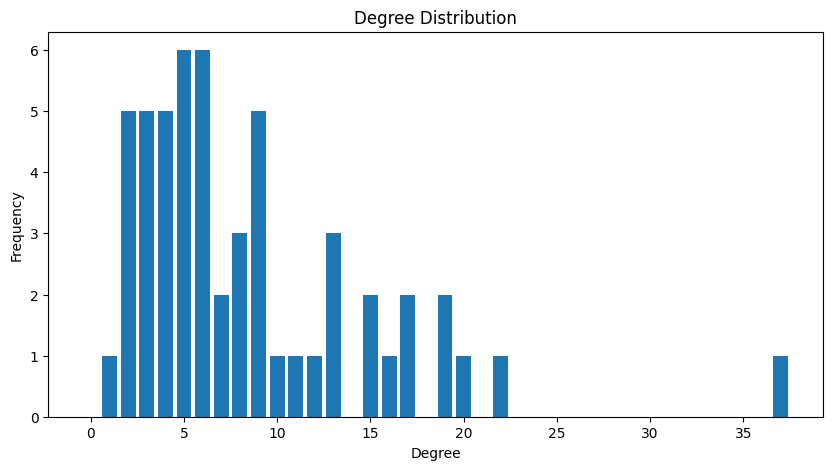

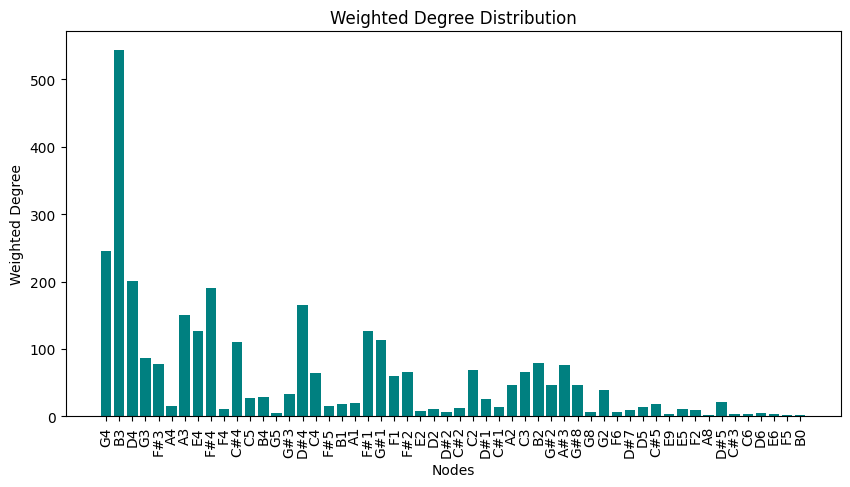

Degree Centrality: {'B3': 0.6981132075471698, 'D#4': 0.4150943396226415, 'G4': 0.3773584905660377, 'E4': 0.3584905660377358, 'A#3': 0.3584905660377358, 'D4': 0.32075471698113206, 'A3': 0.32075471698113206, 'F#4': 0.3018867924528302, 'C4': 0.2830188679245283, 'F#2': 0.2830188679245283, 'F#3': 0.24528301886792453, 'C#4': 0.24528301886792453, 'G#8': 0.24528301886792453, 'B2': 0.22641509433962265, 'C3': 0.20754716981132074, 'G3': 0.18867924528301885, 'F#1': 0.16981132075471697, 'G#1': 0.16981132075471697, 'A2': 0.16981132075471697, 'G#2': 0.16981132075471697, 'G2': 0.16981132075471697, 'F1': 0.1509433962264151, 'C#1': 0.1509433962264151, 'C#5': 0.1509433962264151, 'F#5': 0.1320754716981132, 'D#5': 0.1320754716981132, 'C5': 0.11320754716981132, 'B4': 0.11320754716981132, 'B1': 0.11320754716981132, 'C2': 0.11320754716981132, 'D#7': 0.11320754716981132, 'E5': 0.11320754716981132, 'G5': 0.09433962264150943, 'G#3': 0.09433962264150943, 'A1': 0.09433962264150943, 'D#1': 0.09433962264150943, 'F6'

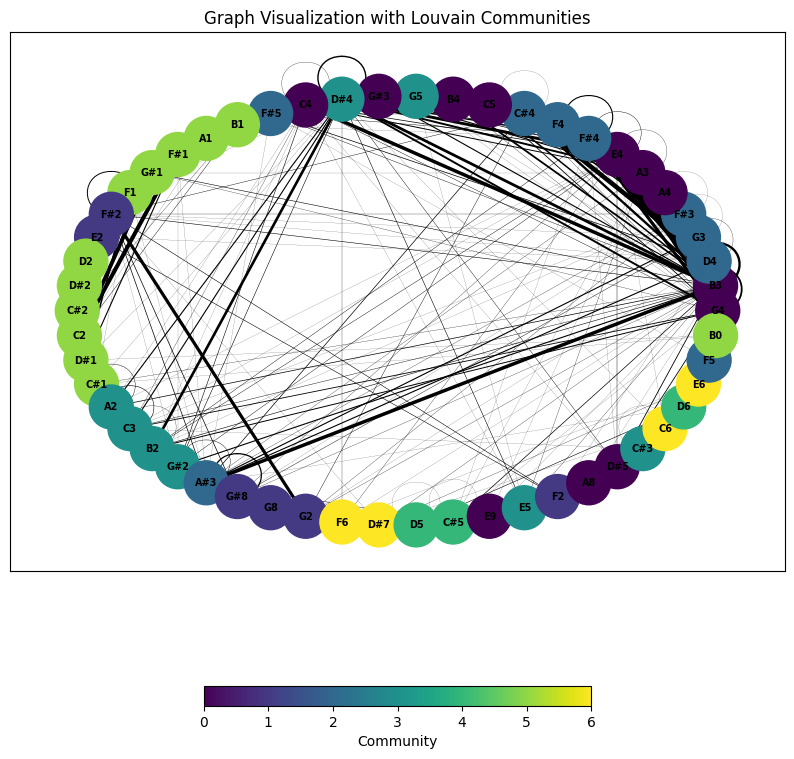

Louvain Communities: [{'G#3', 'B3', 'B4', 'A4', 'A3', 'A8', 'D#5', 'E9', 'E4', 'C4', 'G4', 'C5'}, {'F2', 'E2', 'G#8', 'G2', 'F#2', 'G8'}, {'F#5', 'F#4', 'F4', 'D4', 'C#4', 'G3', 'A#3', 'F5', 'F#3'}, {'C#3', 'B2', 'E5', 'D#4', 'G#2', 'A2', 'G5', 'C3'}, {'D5', 'C#5', 'D6'}, {'A1', 'C#2', 'F1', 'B1', 'D#1', 'D#2', 'D2', 'C#1', 'G#1', 'B0', 'C2', 'F#1'}, {'C6', 'D#7', 'F6', 'E6'}]


In [ ]:
analyze_graph(G1)

Average Clustering Coefficient: 0.4715601875966563
Degree Distribution: {1: 3, 2: 12, 3: 12, 4: 5, 5: 2, 6: 5, 7: 1, 8: 6, 9: 1, 10: 1, 11: 2, 12: 4, 13: 4, 14: 2, 15: 3, 16: 1, 17: 1, 18: 2, 19: 1}
Weighted Degree Distribution: {'D#3': 85, 'F#5': 20, 'F5': 14, 'D3': 8, 'G5': 8, 'C#3': 60, 'B2': 424, 'C3': 63, 'G#5': 25, 'A#5': 18, 'B5': 19, 'A5': 9, 'D5': 9, 'C#5': 40, 'E3': 21, 'D#5': 35, 'E5': 8, 'F#1': 217, 'F1': 1027, 'D#1': 1141, 'C#1': 402, 'D2': 9, 'B0': 256, 'F0': 5, 'G#0': 52, 'C2': 111, 'E2': 57, 'D#2': 21, 'F#3': 232, 'G3': 269, 'G4': 15, 'G#4': 4, 'G#3': 17, 'A#4': 15, 'A4': 4, 'F3': 6, 'B4': 14, 'C5': 14, 'F#6': 31, 'G6': 4, 'B1': 142, 'A1': 181, 'G#1': 170, 'A2': 11, 'G2': 3, 'A6': 5, 'C#4': 3, 'A#3': 16, 'B3': 3, 'A3': 4, 'F2': 2, 'B8': 4, 'G8': 2, 'C#8': 2, 'G#7': 4, 'D#8': 2, 'A7': 2, 'C#7': 2, 'D#7': 3, 'B6': 2, 'A#6': 1, 'E6': 2, 'D#6': 2, 'C6': 2, 'E4': 4, 'F#4': 1, 'F4': 2, 'A9': 48}


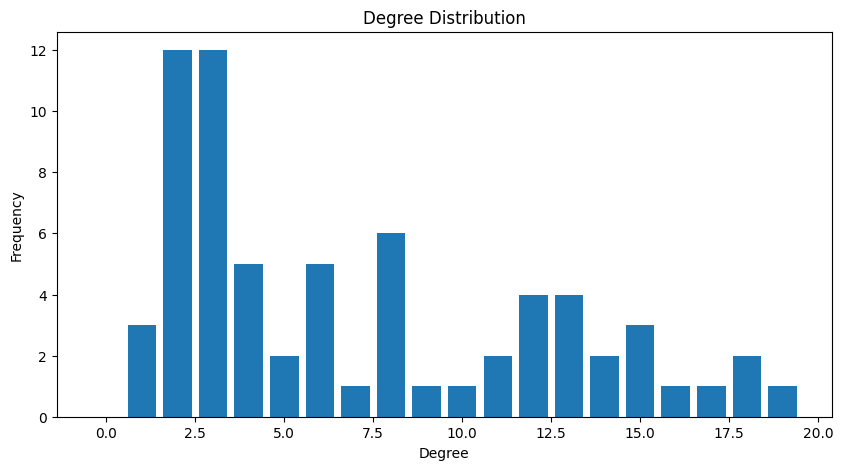

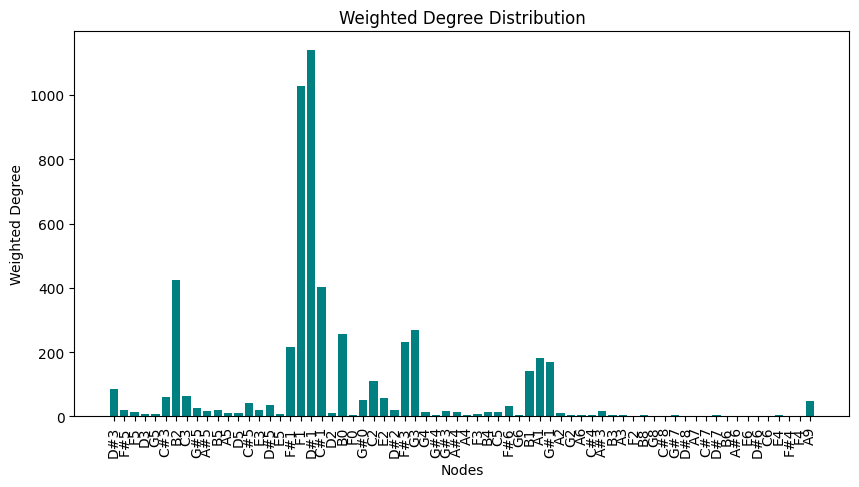

Degree Centrality: {'D#1': 0.2835820895522388, 'D#3': 0.26865671641791045, 'G3': 0.26865671641791045, 'F1': 0.2537313432835821, 'C#3': 0.23880597014925373, 'C#5': 0.22388059701492538, 'E2': 0.22388059701492538, 'G#1': 0.22388059701492538, 'B2': 0.208955223880597, 'F#6': 0.208955223880597, 'D#5': 0.19402985074626866, 'C#1': 0.19402985074626866, 'C2': 0.19402985074626866, 'A1': 0.19402985074626866, 'E3': 0.1791044776119403, 'F#3': 0.1791044776119403, 'B1': 0.1791044776119403, 'A#3': 0.1791044776119403, 'C3': 0.16417910447761194, 'B4': 0.16417910447761194, 'B0': 0.14925373134328357, 'A#4': 0.13432835820895522, 'F#5': 0.11940298507462686, 'G#5': 0.11940298507462686, 'A#5': 0.11940298507462686, 'F#1': 0.11940298507462686, 'D#2': 0.11940298507462686, 'C5': 0.11940298507462686, 'D5': 0.1044776119402985, 'F5': 0.08955223880597014, 'B5': 0.08955223880597014, 'E5': 0.08955223880597014, 'G#0': 0.08955223880597014, 'G4': 0.08955223880597014, 'D3': 0.07462686567164178, 'F3': 0.07462686567164178, 'D

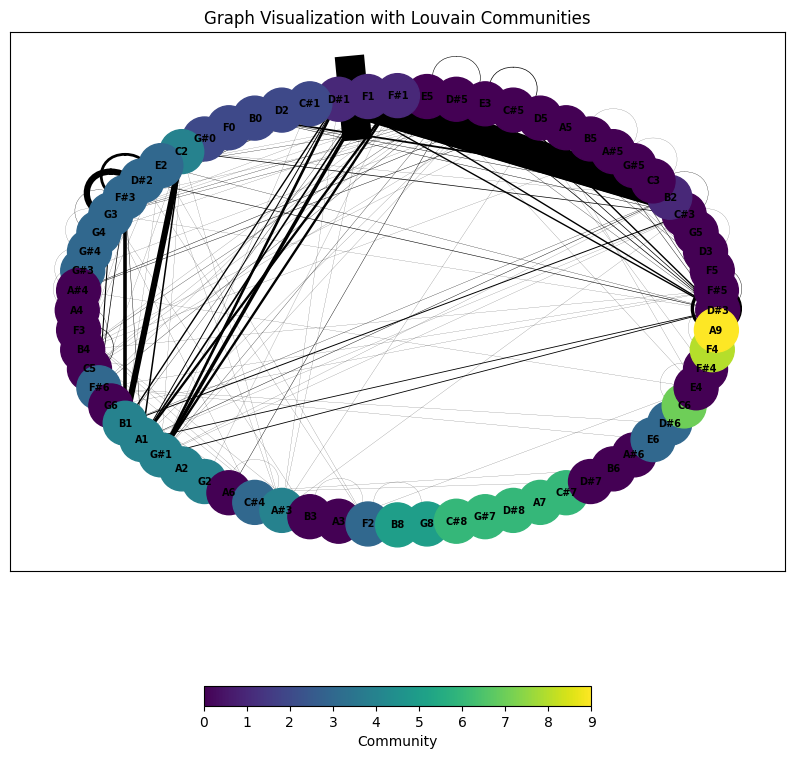

Louvain Communities: [{'B3', 'B5', 'B4', 'D5', 'C#3', 'A#5', 'A5', 'A#4', 'C3', 'F5', 'D#7', 'C5', 'D#3', 'G6', 'F#5', 'F#4', 'A4', 'B6', 'A3', 'D#5', 'A6', 'D3', 'E5', 'F3', 'E4', 'G#5', 'C#5', 'G5', 'E3', 'A#6'}, {'B2', 'F1', 'F#1', 'D#1'}, {'D2', 'C#1', 'G#0', 'B0', 'F0'}, {'D#6', 'E6', 'D#2', 'F#6', 'G#4', 'F2', 'E2', 'C#4', 'G3', 'G4', 'G#3', 'F#3'}, {'A1', 'A2', 'B1', 'G#1', 'A#3', 'C2', 'G2'}, {'B8', 'G8'}, {'A7', 'C#8', 'G#7', 'C#7', 'D#8'}, {'C6'}, {'F4'}, {'A9'}]


In [ ]:
analyze_graph(G2)

Average Clustering Coefficient: 0.45582173047671426
Degree Distribution: {1: 2, 2: 2, 3: 4, 4: 6, 5: 5, 6: 6, 7: 5, 8: 6, 9: 3, 10: 3, 11: 7, 12: 1, 13: 3, 14: 1, 15: 1, 16: 2, 17: 1, 18: 2, 19: 1, 20: 2, 21: 3, 22: 1, 25: 2, 26: 1, 28: 1, 29: 1}
Weighted Degree Distribution: {'D#1': 530, 'F#1': 364, 'F1': 489, 'B1': 28, 'F#4': 120, 'D#4': 65, 'G4': 69, 'D#6': 8, 'A#5': 20, 'G5': 37, 'D5': 19, 'E5': 8, 'G#5': 9, 'A5': 17, 'B4': 44, 'C#6': 12, 'G#1': 180, 'E3': 27, 'D#3': 42, 'B3': 32, 'F5': 11, 'C6': 9, 'A6': 3, 'G6': 8, 'B2': 18, 'D3': 85, 'F#2': 34, 'C#2': 19, 'D2': 15, 'F#3': 14, 'F3': 21, 'C#1': 691, 'D6': 11, 'A#6': 7, 'B0': 658, 'G#0': 142, 'A1': 55, 'G2': 18, 'G3': 32, 'D#2': 22, 'E2': 23, 'E6': 5, 'F#5': 62, 'C5': 16, 'F2': 17, 'C2': 15, 'C7': 5, 'F4': 10, 'C#5': 26, 'B5': 21, 'C#3': 29, 'C3': 57, 'B6': 5, 'F#6': 3, 'C4': 8, 'F6': 7, 'D#5': 17, 'D4': 12, 'A4': 3, 'G#4': 12, 'A#4': 7, 'G#6': 9, 'F#8': 1, 'A#2': 7, 'C#4': 16, 'G#3': 11, 'G#2': 8, 'F0': 6, 'A2': 8, 'G7': 3, 'A#3':

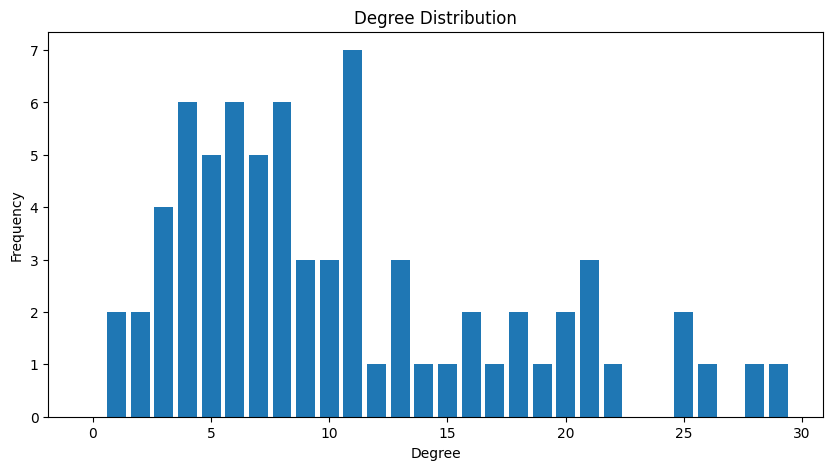

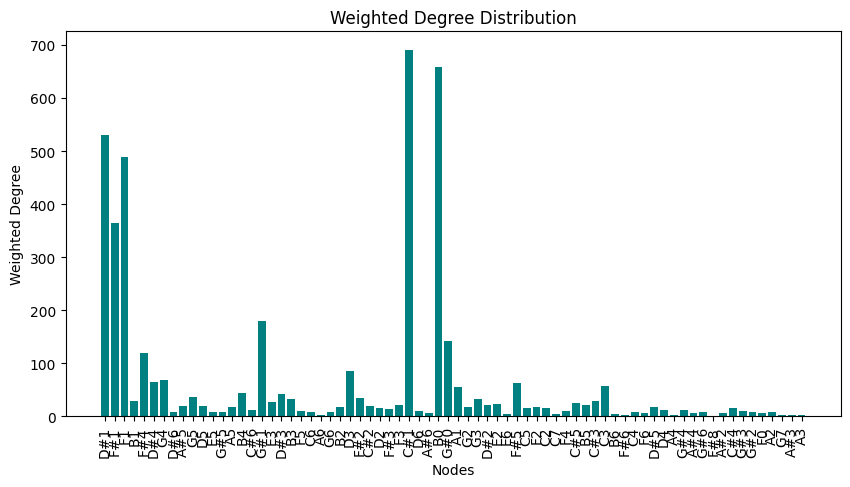

Degree Centrality: {'F#4': 0.4084507042253521, 'B0': 0.3943661971830986, 'B4': 0.36619718309859156, 'D3': 0.35211267605633806, 'C#1': 0.35211267605633806, 'F1': 0.3098591549295775, 'D#1': 0.29577464788732394, 'D#4': 0.29577464788732394, 'C3': 0.29577464788732394, 'F#1': 0.28169014084507044, 'G#1': 0.28169014084507044, 'G4': 0.26760563380281693, 'G5': 0.2535211267605634, 'F#5': 0.2535211267605634, 'B3': 0.23943661971830987, 'F#2': 0.22535211267605634, 'A1': 0.22535211267605634, 'G3': 0.2112676056338028, 'D#3': 0.1971830985915493, 'A#5': 0.18309859154929578, 'G#0': 0.18309859154929578, 'C#5': 0.18309859154929578, 'D#2': 0.16901408450704225, 'B1': 0.15492957746478875, 'D5': 0.15492957746478875, 'B2': 0.15492957746478875, 'F3': 0.15492957746478875, 'G2': 0.15492957746478875, 'E2': 0.15492957746478875, 'B5': 0.15492957746478875, 'A5': 0.14084507042253522, 'C5': 0.14084507042253522, 'D#5': 0.14084507042253522, 'C#2': 0.1267605633802817, 'D6': 0.1267605633802817, 'C#3': 0.1267605633802817, 'E

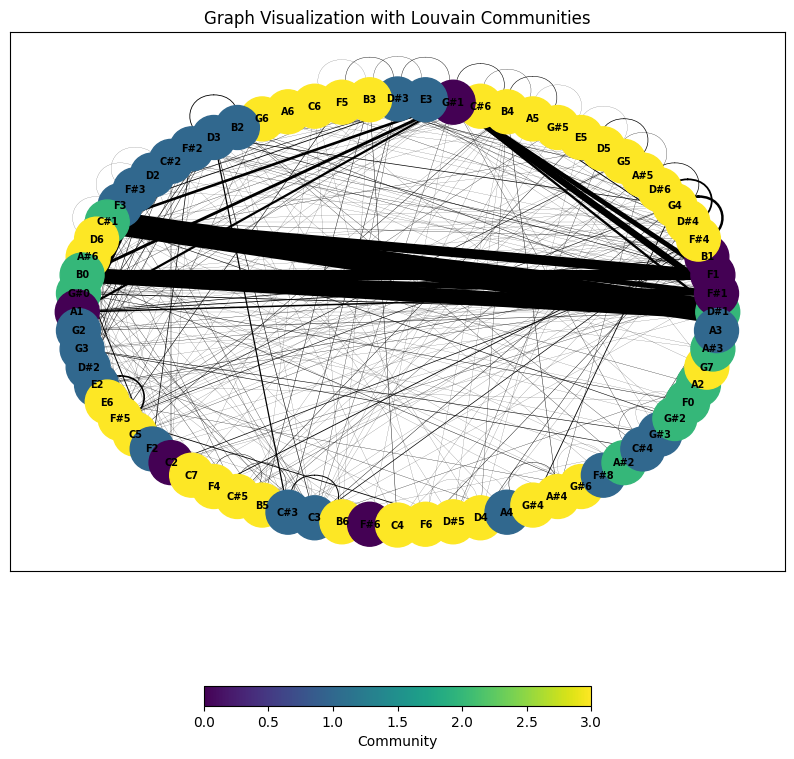

Louvain Communities: [{'F1', 'A1', 'B1', 'G#1', 'F#6', 'C2', 'F#1'}, {'C#3', 'B2', 'D#2', 'E2', 'F2', 'F#8', 'G3', 'C3', 'G#3', 'D#3', 'C#2', 'A4', 'A3', 'D3', 'F3', 'D2', 'C#4', 'F#2', 'E3', 'G2', 'F#3'}, {'A#2', 'G#2', 'A2', 'C#1', 'G#0', 'D#1', 'B0', 'A#3', 'F0'}, {'G#6', 'B3', 'C7', 'B5', 'D5', 'E6', 'A#5', 'D4', 'F5', 'G7', 'D#6', 'F#4', 'B6', 'E5', 'G5', 'D6', 'C#6', 'B4', 'F6', 'F4', 'C4', 'A5', 'A#4', 'G6', 'C5', 'F#5', 'C6', 'D#5', 'A6', 'G#4', 'D#4', 'G#5', 'C#5', 'G4', 'A#6'}]


In [ ]:
analyze_graph(G3)

Average Clustering Coefficient: 0.6191768731315912
Degree Distribution: {1: 2, 2: 4, 3: 4, 4: 3, 5: 4, 6: 3, 7: 3, 9: 3, 10: 3, 11: 1, 12: 2, 13: 2, 15: 2, 16: 2, 17: 2, 18: 3, 19: 2, 20: 1, 22: 3, 23: 2, 25: 2, 26: 1, 28: 1, 29: 1}
Weighted Degree Distribution: {'D#3': 9, 'E3': 82, 'F6': 6, 'A5': 33, 'E6': 28, 'B5': 13, 'G#5': 38, 'D#6': 17, 'G6': 5, 'D6': 56, 'C#6': 19, 'G#4': 20, 'C6': 3, 'C5': 14, 'F#6': 1, 'B4': 10, 'F1': 304, 'G#1': 199, 'F#1': 335, 'G#2': 648, 'E2': 342, 'A2': 543, 'F2': 238, 'B2': 12, 'B1': 816, 'D#2': 227, 'F#2': 126, 'A#3': 131, 'A#2': 8, 'C2': 445, 'C#2': 1107, 'G2': 26, 'D#1': 43, 'A3': 17, 'E4': 15, 'D#4': 10, 'A1': 595, 'A4': 104, 'D#5': 9, 'D5': 40, 'C3': 2, 'C#1': 47, 'B0': 2, 'G3': 436, 'G#3': 15, 'F#3': 2, 'D2': 264, 'C#5': 27, 'A#4': 20, 'E5': 20, 'F5': 4, 'C4': 11, 'B3': 25, 'G4': 16, 'F#4': 1, 'A#5': 6}


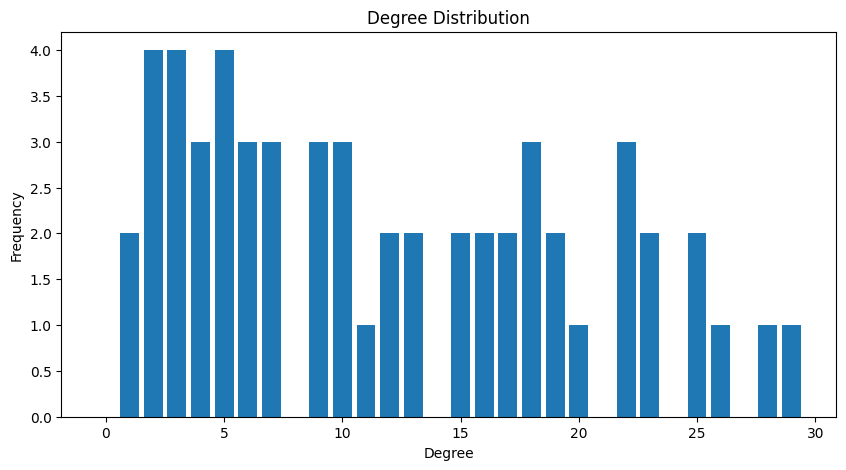

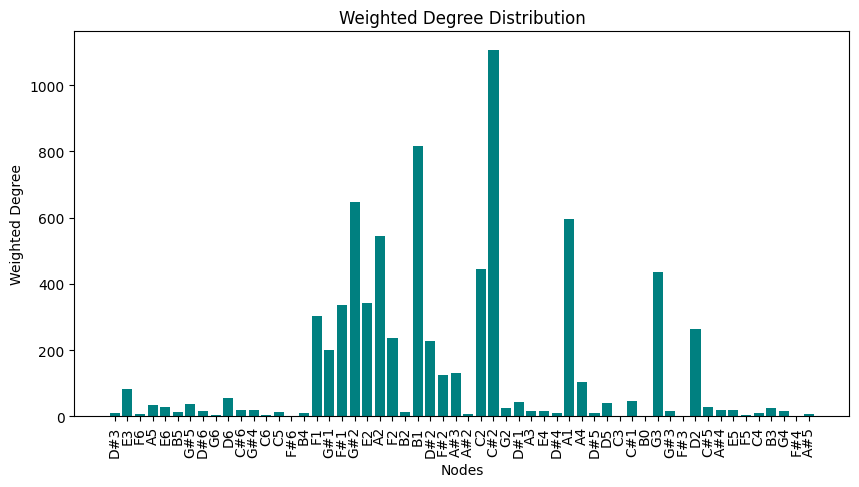

Degree Centrality: {'G#2': 0.5272727272727272, 'A2': 0.509090909090909, 'A4': 0.4727272727272727, 'E3': 0.45454545454545453, 'C#2': 0.45454545454545453, 'E2': 0.41818181818181815, 'C#1': 0.41818181818181815, 'F1': 0.39999999999999997, 'C2': 0.39999999999999997, 'A1': 0.39999999999999997, 'D2': 0.36363636363636365, 'F#1': 0.34545454545454546, 'B1': 0.34545454545454546, 'D6': 0.32727272727272727, 'F#2': 0.32727272727272727, 'G3': 0.32727272727272727, 'G#1': 0.3090909090909091, 'F2': 0.3090909090909091, 'D#2': 0.2909090909090909, 'D5': 0.2909090909090909, 'A#3': 0.2727272727272727, 'C#5': 0.2727272727272727, 'G2': 0.23636363636363636, 'B3': 0.23636363636363636, 'E6': 0.21818181818181817, 'C5': 0.21818181818181817, 'D#1': 0.19999999999999998, 'A5': 0.18181818181818182, 'E4': 0.18181818181818182, 'E5': 0.18181818181818182, 'G#5': 0.16363636363636364, 'D#6': 0.16363636363636364, 'G4': 0.16363636363636364, 'C#6': 0.12727272727272726, 'A3': 0.12727272727272726, 'C4': 0.12727272727272726, 'D#3'

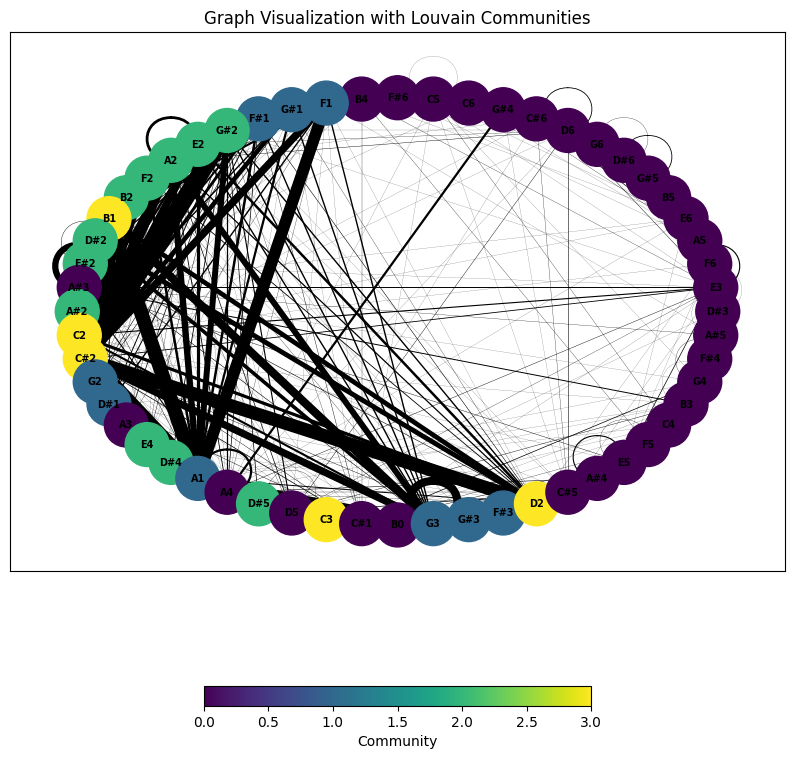

Louvain Communities: [{'C#6', 'B3', 'E6', 'D5', 'F6', 'B5', 'B4', 'A#5', 'C#1', 'C4', 'A5', 'B0', 'F5', 'A#3', 'A#4', 'G6', 'C5', 'D#3', 'D#6', 'F#4', 'A4', 'C6', 'A3', 'F#6', 'G#4', 'E5', 'G#5', 'C#5', 'G4', 'E3', 'D6'}, {'G#3', 'A1', 'F1', 'D#1', 'G3', 'G#1', 'F#1', 'G2', 'F#3'}, {'A#2', 'B2', 'D#5', 'D#2', 'D#4', 'G#2', 'F2', 'A2', 'E2', 'E4', 'F#2'}, {'C#2', 'D2', 'B1', 'C3', 'C2'}]


In [ ]:
analyze_graph(G4)

Average Clustering Coefficient: 0.5954985816755838
Degree Distribution: {1: 2, 2: 6, 3: 3, 4: 4, 5: 6, 6: 5, 7: 1, 8: 4, 9: 4, 10: 2, 11: 3, 12: 4, 13: 2, 15: 3, 16: 2, 17: 3, 18: 3, 19: 1, 20: 2, 21: 3, 24: 2, 25: 1, 26: 2, 27: 2, 29: 2, 30: 1, 32: 1, 34: 1, 37: 2}
Weighted Degree Distribution: {'G#5': 95, 'C5': 124, 'A1': 1482, 'G#1': 1273, 'E6': 21, 'B4': 129, 'A2': 457, 'G#4': 165, 'G#7': 9, 'B1': 490, 'F#1': 811, 'F#5': 36, 'A5': 71, 'E5': 244, 'A4': 172, 'D#3': 13, 'C6': 21, 'E4': 215, 'B3': 117, 'B5': 36, 'C4': 16, 'A3': 93, 'G3': 8, 'D#5': 185, 'E3': 22, 'C#4': 7, 'F#3': 33, 'G4': 80, 'D5': 87, 'F#4': 33, 'G5': 5, 'F#2': 151, 'F2': 64, 'B2': 65, 'G#2': 130, 'D#4': 33, 'C2': 297, 'F1': 615, 'C#2': 240, 'D#1': 83, 'D#2': 57, 'A#4': 22, 'G#3': 28, 'A#5': 16, 'G2': 33, 'E2': 166, 'D2': 93, 'A#3': 4, 'A#2': 10, 'C#3': 46, 'F3': 8, 'D4': 12, 'F4': 32, 'C#5': 30, 'F5': 22, 'D#6': 4, 'D6': 11, 'F6': 8, 'C#6': 8, 'G#6': 6, 'A6': 13, 'C3': 9, 'C#1': 8, 'C7': 3, 'B6': 6, 'F#6': 7, 'F7': 1

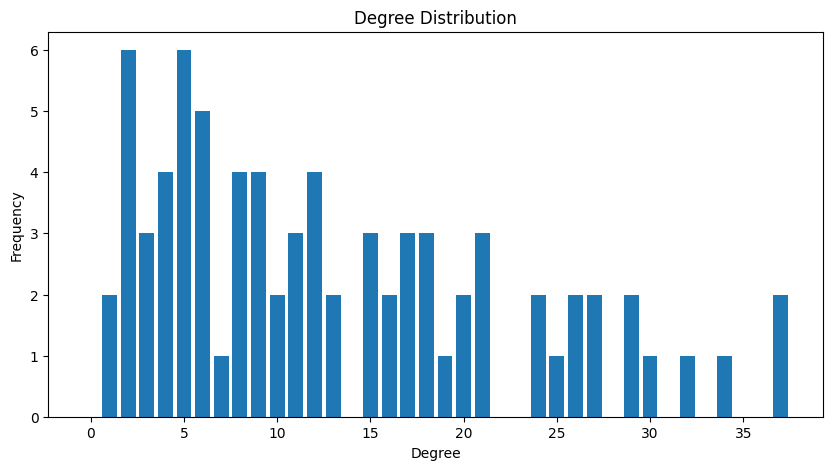

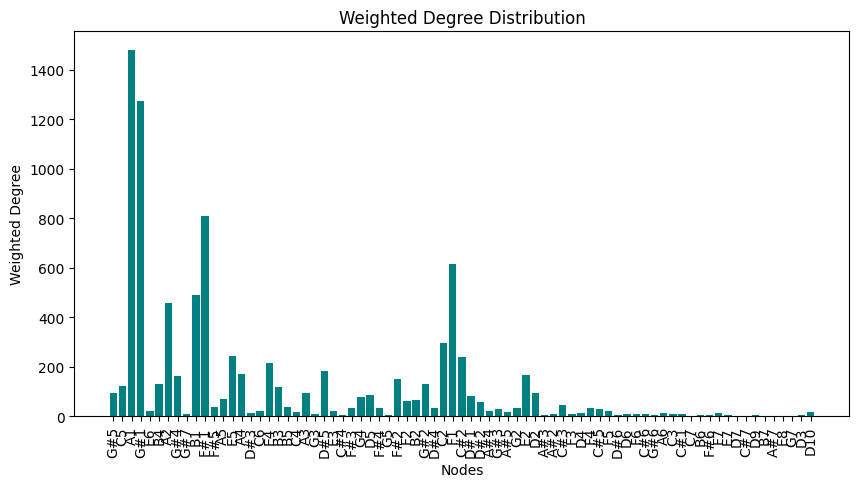

Degree Centrality: {'A2': 0.48684210526315785, 'G#4': 0.48684210526315785, 'G#1': 0.4473684210526315, 'E4': 0.42105263157894735, 'E5': 0.39473684210526316, 'A4': 0.381578947368421, 'D#5': 0.381578947368421, 'A1': 0.35526315789473684, 'B3': 0.35526315789473684, 'C5': 0.3421052631578947, 'F#2': 0.3421052631578947, 'E2': 0.3289473684210526, 'A5': 0.3157894736842105, 'A3': 0.3157894736842105, 'G#5': 0.2763157894736842, 'B4': 0.2763157894736842, 'F1': 0.2763157894736842, 'B5': 0.2631578947368421, 'F2': 0.2631578947368421, 'B2': 0.25, 'F#1': 0.23684210526315788, 'F#5': 0.23684210526315788, 'F#3': 0.23684210526315788, 'B1': 0.22368421052631576, 'G4': 0.22368421052631576, 'D#2': 0.22368421052631576, 'G#2': 0.21052631578947367, 'C#2': 0.21052631578947367, 'D5': 0.19736842105263158, 'C2': 0.19736842105263158, 'D2': 0.19736842105263158, 'E6': 0.17105263157894735, 'C#5': 0.17105263157894735, 'E3': 0.15789473684210525, 'D#4': 0.15789473684210525, 'D#1': 0.15789473684210525, 'C#3': 0.157894736842105

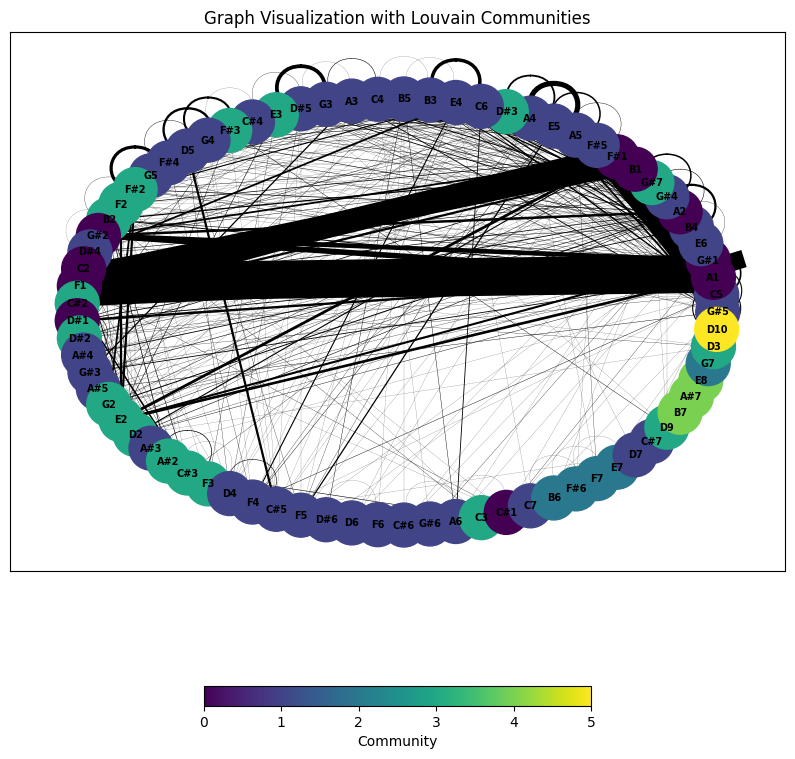

Louvain Communities: [{'A1', 'F1', 'B1', 'D#1', 'G#2', 'A2', 'C#1', 'G#1', 'C2', 'F#1'}, {'G#6', 'B3', 'C7', 'E6', 'D5', 'B5', 'D4', 'A#5', 'G3', 'A#3', 'F5', 'D7', 'D#6', 'F#4', 'A4', 'E5', 'G5', 'D6', 'C#6', 'B4', 'F6', 'C#7', 'F4', 'C4', 'A#4', 'A5', 'G#3', 'C5', 'F#5', 'C6', 'A3', 'D#5', 'G#4', 'A6', 'D#4', 'E4', 'G#5', 'C#4', 'C#5', 'G4'}, {'E7', 'B6', 'F7', 'G7', 'F#6'}, {'C#3', 'B2', 'A#2', 'D#2', 'F2', 'E2', 'D9', 'C3', 'D#3', 'C#2', 'G#7', 'D3', 'F3', 'D2', 'F#2', 'E3', 'G2', 'F#3'}, {'E8', 'A#7', 'B7'}, {'D10'}]


In [ ]:
analyze_graph(G5)

Average Clustering Coefficient: 0.47683543566872305
Degree Distribution: {1: 4, 2: 6, 3: 5, 4: 5, 5: 7, 6: 4, 7: 5, 8: 1, 9: 1, 10: 1, 11: 5, 12: 2, 13: 6, 14: 5, 15: 2, 16: 4, 17: 3, 18: 3, 19: 2, 20: 5, 21: 1, 26: 1, 36: 1, 41: 1, 44: 1}
Weighted Degree Distribution: {'A9': 12, 'E4': 163, 'F4': 52, 'F2': 1510, 'E2': 778, 'F#2': 1070, 'F6': 30, 'F#6': 6, 'G#5': 28, 'C#1': 22, 'B1': 1246, 'D#1': 44, 'C#2': 83, 'F0': 32, 'G#0': 37, 'A1': 636, 'B0': 25, 'F#1': 154, 'C2': 1136, 'G#2': 556, 'G#1': 169, 'D#2': 201, 'C#0': 19, 'F1': 85, 'D2': 89, 'B2': 323, 'F#3': 31, 'G2': 325, 'A2': 211, 'F#4': 5, 'G3': 5, 'A#8': 4, 'G#3': 4, 'B4': 122, 'A#4': 37, 'A4': 20, 'F3': 56, 'C#5': 9, 'C5': 115, 'C#3': 15, 'C#4': 4, 'C4': 8, 'E5': 51, 'C3': 217, 'A3': 14, 'B7': 2, 'G4': 34, 'A#2': 3, 'B3': 24, 'E3': 79, 'D#3': 37, 'B5': 24, 'A#3': 8, 'G6': 7, 'C#6': 17, 'G#4': 21, 'D6': 20, 'D#6': 6, 'C6': 32, 'A#5': 6, 'A5': 8, 'E6': 5, 'G8': 10, 'F#5': 14, 'G5': 22, 'D9': 1, 'F5': 30, 'D7': 4, 'G9': 6, 'A8': 4, 

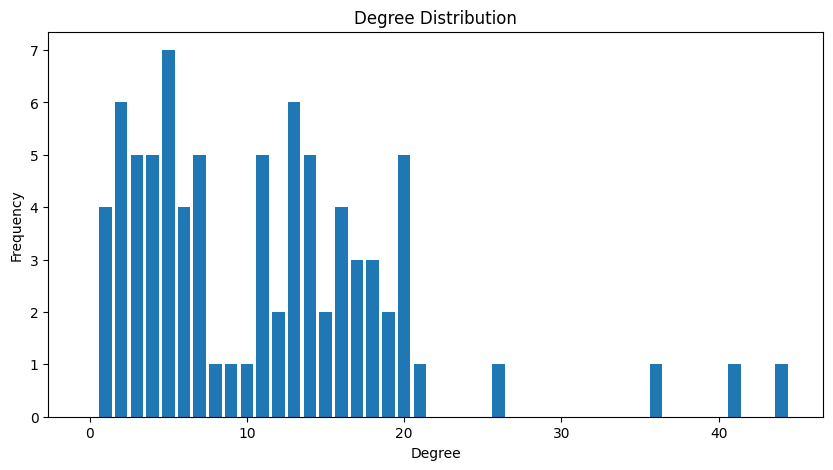

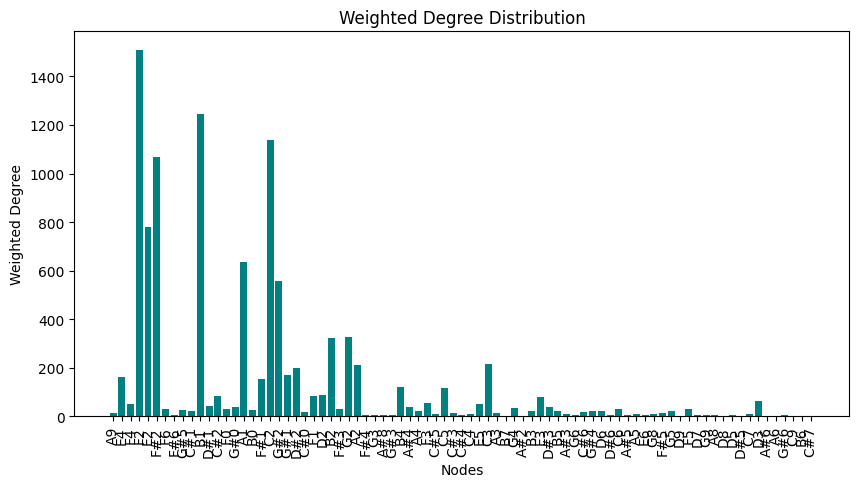

Degree Centrality: {'F#2': 0.55, 'F2': 0.5125000000000001, 'E2': 0.45, 'C5': 0.325, 'F#1': 0.2625, 'E4': 0.25, 'B1': 0.25, 'D#2': 0.25, 'A2': 0.25, 'B4': 0.25, 'G#1': 0.23750000000000002, 'G2': 0.23750000000000002, 'A1': 0.225, 'G#2': 0.225, 'C6': 0.225, 'C#2': 0.21250000000000002, 'F1': 0.21250000000000002, 'E3': 0.21250000000000002, 'F0': 0.2, 'C2': 0.2, 'A#4': 0.2, 'F3': 0.2, 'E5': 0.1875, 'D#3': 0.1875, 'G#5': 0.17500000000000002, 'D#1': 0.17500000000000002, 'B0': 0.17500000000000002, 'B5': 0.17500000000000002, 'G5': 0.17500000000000002, 'G#0': 0.1625, 'D2': 0.1625, 'G4': 0.1625, 'B3': 0.1625, 'G#4': 0.1625, 'F5': 0.1625, 'F6': 0.15000000000000002, 'D6': 0.15000000000000002, 'F4': 0.1375, 'C#1': 0.1375, 'B2': 0.1375, 'A4': 0.1375, 'C#3': 0.1375, 'F#5': 0.125, 'C#6': 0.1125, 'C#0': 0.1, 'F#3': 0.08750000000000001, 'C#5': 0.08750000000000001, 'C3': 0.08750000000000001, 'A3': 0.08750000000000001, 'A#3': 0.08750000000000001, 'G6': 0.07500000000000001, 'D#6': 0.07500000000000001, 'A5': 

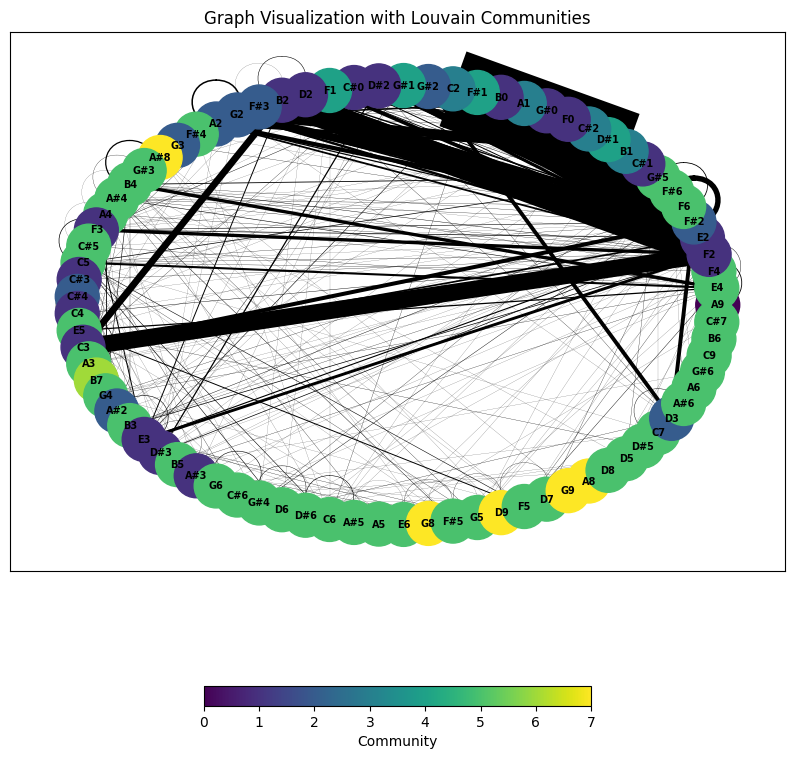

Louvain Communities: [{'A9'}, {'C#3', 'B2', 'D#2', 'F2', 'E2', 'C#1', 'F0', 'C4', 'A#3', 'B0', 'C3', 'D#3', 'F3', 'C#0', 'D2', 'G#0', 'E3'}, {'A#2', 'D3', 'G#2', 'A2', 'C#4', 'G3', 'F#2', 'G2', 'F#3'}, {'A1', 'C#2', 'C2', 'B1'}, {'D#1', 'F1', 'F#1', 'G#1'}, {'G#6', 'C7', 'B3', 'B5', 'D5', 'E6', 'A#5', 'F5', 'D7', 'D#6', 'F#4', 'A4', 'B6', 'E5', 'G5', 'D6', 'C#6', 'B4', 'F6', 'C#7', 'F4', 'A5', 'A#4', 'C9', 'G6', 'G#3', 'C5', 'F#5', 'C6', 'A3', 'D8', 'D#5', 'F#6', 'G#4', 'A6', 'E4', 'G#5', 'C#5', 'G4', 'A#6'}, {'B7'}, {'D9', 'G9', 'A8', 'G8', 'A#8'}]


In [ ]:
analyze_graph(G6)

Average Clustering Coefficient: 0.631858702192669
Degree Distribution: {1: 3, 2: 7, 3: 2, 4: 5, 5: 1, 6: 4, 7: 3, 8: 6, 9: 2, 10: 2, 11: 4, 12: 1, 13: 1, 14: 1, 15: 2, 16: 4, 17: 2, 18: 1, 19: 1, 20: 1, 29: 1, 32: 1, 39: 1, 43: 1}
Weighted Degree Distribution: {'G#5': 54, 'C#1': 262, 'D2': 27, 'A5': 69, 'E6': 48, 'A3': 5, 'D#4': 2, 'D#6': 13, 'F6': 34, 'F#6': 17, 'G6': 40, 'E4': 9, 'D#5': 1, 'G#1': 1634, 'G3': 20, 'F#3': 29, 'G5': 136, 'C#6': 35, 'D6': 64, 'F#1': 2524, 'A1': 1510, 'B1': 1077, 'C2': 386, 'A2': 115, 'F#5': 42, 'F1': 263, 'F#2': 193, 'C#2': 239, 'G#2': 1, 'B0': 183, 'G#0': 90, 'D#1': 475, 'D#2': 33, 'E2': 12, 'A4': 11, 'E5': 21, 'C5': 25, 'C#5': 22, 'F2': 3, 'F5': 14, 'B4': 4, 'G4': 73, 'D5': 2, 'B2': 2, 'G#4': 3, 'C6': 5, 'B5': 9, 'A6': 9, 'G#6': 37, 'A#5': 8, 'G2': 13, 'B6': 1, 'A#4': 7, 'F#4': 4, 'C7': 2, 'A#6': 17, 'A9': 12}


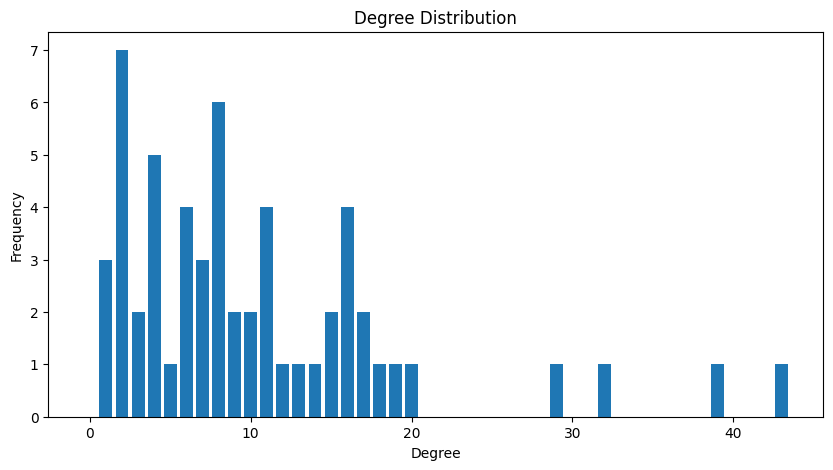

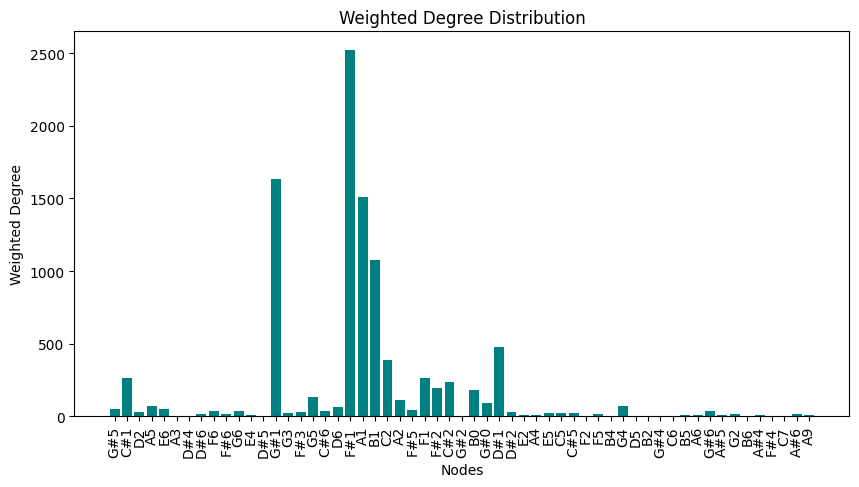

Degree Centrality: {'F#1': 0.7678571428571428, 'G#1': 0.6964285714285714, 'A1': 0.5714285714285714, 'B1': 0.5178571428571428, 'A5': 0.3571428571428571, 'C2': 0.33928571428571425, 'G#5': 0.3214285714285714, 'G5': 0.30357142857142855, 'D6': 0.30357142857142855, 'E6': 0.2857142857142857, 'F1': 0.2857142857142857, 'B0': 0.2857142857142857, 'D#1': 0.2857142857142857, 'G6': 0.26785714285714285, 'C#6': 0.26785714285714285, 'C#1': 0.25, 'F6': 0.23214285714285712, 'F#2': 0.21428571428571427, 'F#3': 0.19642857142857142, 'C#2': 0.19642857142857142, 'E5': 0.19642857142857142, 'G4': 0.19642857142857142, 'F#6': 0.17857142857142855, 'C#5': 0.17857142857142855, 'D#6': 0.1607142857142857, 'C5': 0.1607142857142857, 'E4': 0.14285714285714285, 'G3': 0.14285714285714285, 'F#5': 0.14285714285714285, 'G#0': 0.14285714285714285, 'D#2': 0.14285714285714285, 'G#6': 0.14285714285714285, 'F5': 0.125, 'B5': 0.125, 'A#5': 0.125, 'A2': 0.10714285714285714, 'A4': 0.10714285714285714, 'A6': 0.10714285714285714, 'A#6':

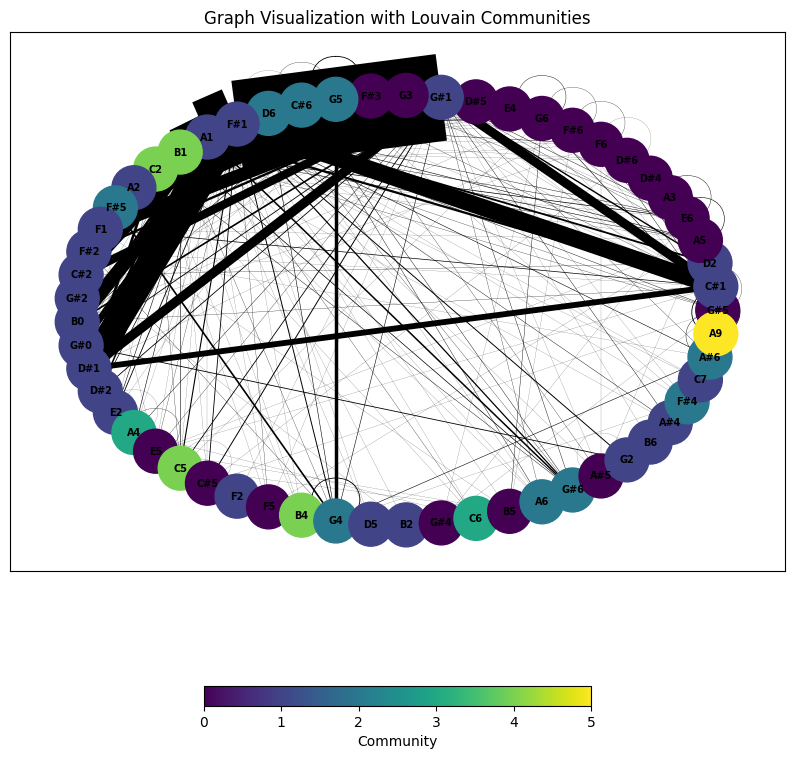

Louvain Communities: [{'E6', 'F6', 'B5', 'A#5', 'G3', 'A5', 'F5', 'G6', 'D#6', 'A3', 'D#5', 'G#4', 'F#6', 'D#4', 'E5', 'E4', 'G#5', 'C#5', 'F#3'}, {'F1', 'C7', 'D5', 'B2', 'D#2', 'G#2', 'E2', 'F2', 'C#1', 'G#1', 'A#4', 'B0', 'F#1', 'A1', 'C#2', 'B6', 'A2', 'D2', 'G#0', 'D#1', 'F#2', 'G2'}, {'F#5', 'C#6', 'G#6', 'F#4', 'A6', 'G5', 'G4', 'A#6', 'D6'}, {'C6', 'A4'}, {'C5', 'C2', 'B1', 'B4'}, {'A9'}]


In [ ]:
analyze_graph(G7)

Average Clustering Coefficient: 0.590689313132121
Degree Distribution: {1: 4, 2: 8, 3: 6, 4: 3, 5: 6, 6: 6, 7: 2, 8: 2, 9: 2, 10: 3, 12: 2, 13: 3, 14: 2, 15: 1, 16: 2, 17: 1, 19: 1, 20: 1, 21: 1, 22: 2, 23: 1, 25: 1, 26: 1, 27: 1, 30: 1}
Weighted Degree Distribution: {'G#6': 42, 'C7': 25, 'A6': 38, 'A#6': 49, 'B6': 27, 'D#7': 5, 'F#6': 118, 'F6': 149, 'F7': 14, 'C8': 4, 'D7': 8, 'C#7': 3, 'E6': 121, 'E7': 20, 'G6': 69, 'B5': 189, 'A5': 77, 'D6': 38, 'A#5': 21, 'G#5': 129, 'G5': 247, 'C6': 61, 'C#6': 26, 'E5': 65, 'F5': 198, 'D#6': 54, 'F#5': 376, 'C4': 4, 'D4': 13, 'D#4': 4, 'E4': 4, 'F4': 2, 'G4': 18, 'D5': 11, 'G#4': 7, 'B4': 4, 'C5': 1, 'D#5': 6, 'A#4': 4, 'F2': 11, 'B1': 736, 'A1': 277, 'F#2': 1284, 'G#1': 1710, 'D#1': 1007, 'F#1': 278, 'F1': 194, 'C#1': 99, 'C#8': 48, 'A7': 15, 'C#2': 137, 'D2': 68, 'E2': 109, 'C#3': 9, 'C3': 20, 'F#4': 4, 'C#5': 10, 'C2': 2, 'E8': 4, 'D#8': 2, 'B0': 2, 'D8': 2, 'F#7': 3}


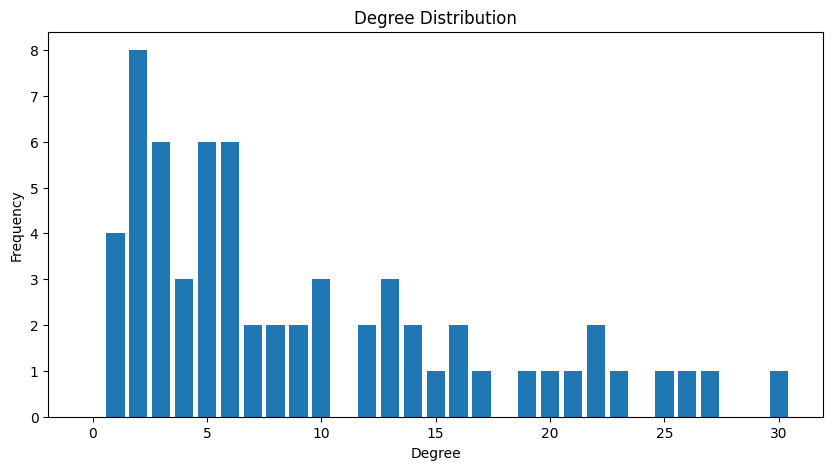

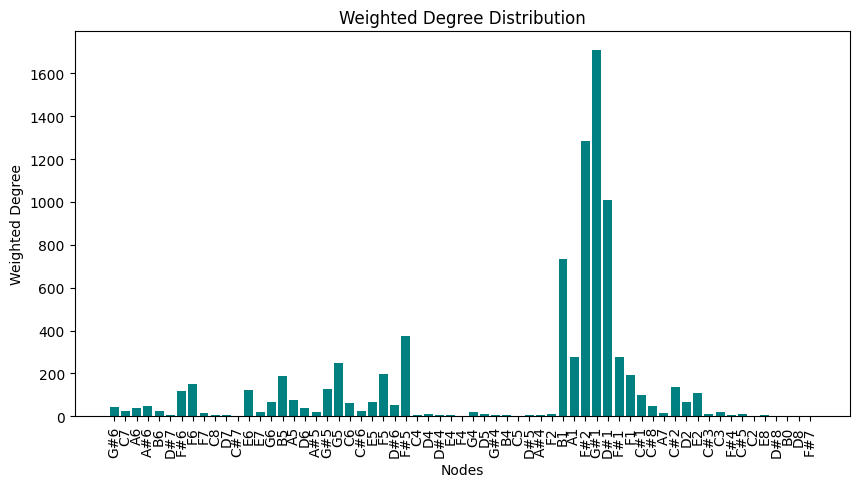

Degree Centrality: {'F#5': 0.4838709677419355, 'F5': 0.43548387096774194, 'E6': 0.4193548387096774, 'G5': 0.4032258064516129, 'F6': 0.3709677419354839, 'B5': 0.3548387096774194, 'G#5': 0.3548387096774194, 'A5': 0.3387096774193548, 'F#6': 0.3225806451612903, 'C#8': 0.3064516129032258, 'G#6': 0.27419354838709675, 'G6': 0.25806451612903225, 'E5': 0.25806451612903225, 'D6': 0.24193548387096775, 'A6': 0.22580645161290322, 'D#6': 0.22580645161290322, 'A#6': 0.2096774193548387, 'B1': 0.2096774193548387, 'G#1': 0.2096774193548387, 'C6': 0.1935483870967742, 'C#6': 0.1935483870967742, 'B6': 0.16129032258064516, 'E7': 0.16129032258064516, 'F#2': 0.16129032258064516, 'D4': 0.14516129032258063, 'A7': 0.14516129032258063, 'G4': 0.12903225806451613, 'A1': 0.12903225806451613, 'A#5': 0.11290322580645161, 'D#1': 0.11290322580645161, 'C7': 0.0967741935483871, 'F7': 0.0967741935483871, 'D7': 0.0967741935483871, 'D5': 0.0967741935483871, 'C#2': 0.0967741935483871, 'C#5': 0.0967741935483871, 'D#7': 0.08064

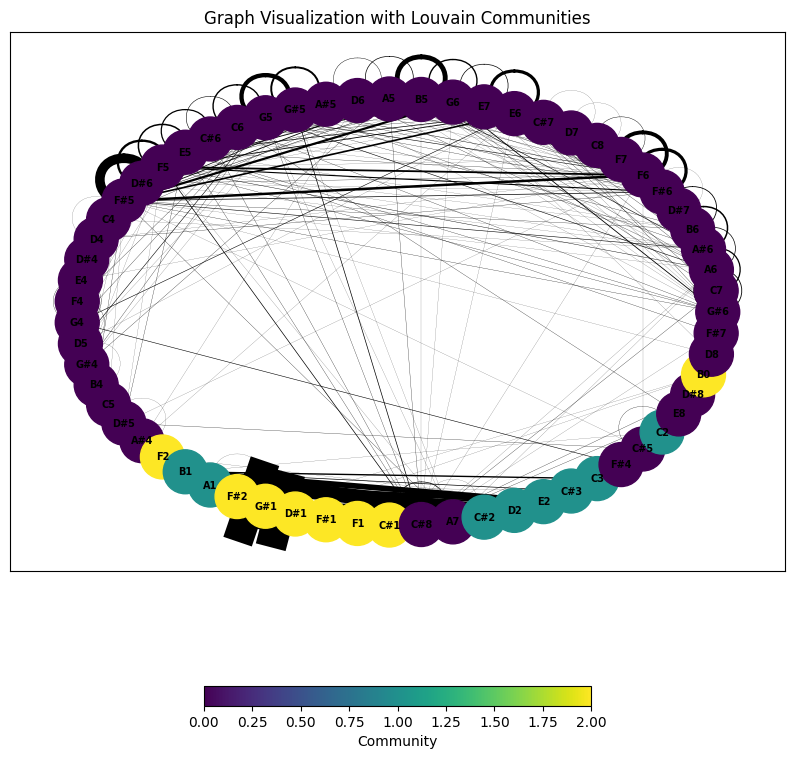

Louvain Communities: [{'G#6', 'C7', 'B5', 'E6', 'F7', 'D5', 'F#7', 'A#5', 'D4', 'C#8', 'F5', 'D#8', 'D7', 'D#6', 'F#4', 'B6', 'E5', 'G5', 'D6', 'C8', 'C#6', 'B4', 'F6', 'C#7', 'F4', 'E8', 'C4', 'A#4', 'A5', 'A7', 'G6', 'C5', 'D#7', 'F#5', 'C6', 'D8', 'D#5', 'G#4', 'F#6', 'D#4', 'A6', 'E4', 'G#5', 'E7', 'C#5', 'G4', 'A#6'}, {'A1', 'C#2', 'B1', 'C#3', 'E2', 'D2', 'C3', 'C2'}, {'F1', 'D#1', 'B0', 'F2', 'C#1', 'G#1', 'F#2', 'F#1'}]


In [ ]:
analyze_graph(G8)

Average Clustering Coefficient: 0.6829878147627005
Degree Distribution: {1: 2, 2: 2, 3: 3, 4: 4, 5: 1, 6: 1, 7: 1, 10: 2, 11: 2, 12: 1, 13: 2, 14: 1, 16: 1, 17: 1, 18: 1, 19: 6, 20: 3, 22: 1, 23: 1, 25: 1, 26: 2, 27: 4, 28: 1, 31: 2, 32: 1, 33: 3, 35: 1, 36: 2, 37: 1, 38: 1, 39: 1, 41: 1, 43: 1, 47: 1, 49: 1}
Weighted Degree Distribution: {'A#5': 322, 'D#5': 38, 'E5': 230, 'F5': 328, 'A5': 167, 'D5': 156, 'A#4': 115, 'G#5': 45, 'G5': 225, 'E4': 145, 'C6': 20, 'F4': 6, 'D#4': 61, 'D#2': 102, 'D3': 70, 'D4': 110, 'F3': 36, 'F2': 120, 'F#5': 107, 'B3': 168, 'C4': 132, 'C5': 16, 'A3': 15, 'A#3': 82, 'A2': 51, 'A#2': 20, 'F#4': 15, 'C#4': 33, 'C#5': 93, 'A4': 24, 'F#3': 47, 'G4': 98, 'G3': 15, 'D#6': 6, 'E3': 34, 'C#1': 153, 'B0': 83, 'B2': 14, 'C3': 28, 'C2': 83, 'D2': 166, 'C#2': 79, 'B1': 44, 'A1': 56, 'D#1': 198, 'F0': 29, 'C#3': 18, 'D#3': 10, 'F1': 95, 'E2': 51, 'F#1': 255, 'G#1': 183, 'G#0': 10, 'D6': 2, 'F#2': 4, 'G#4': 8, 'G#2': 5, 'G2': 1, 'G#3': 1, 'C#0': 4}


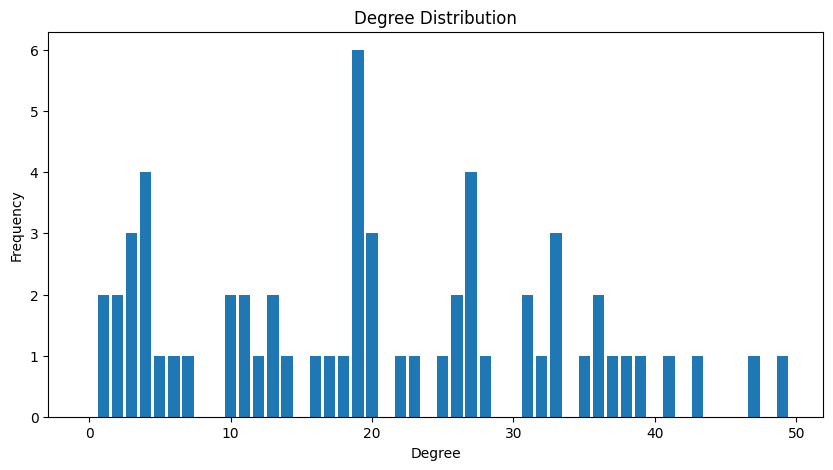

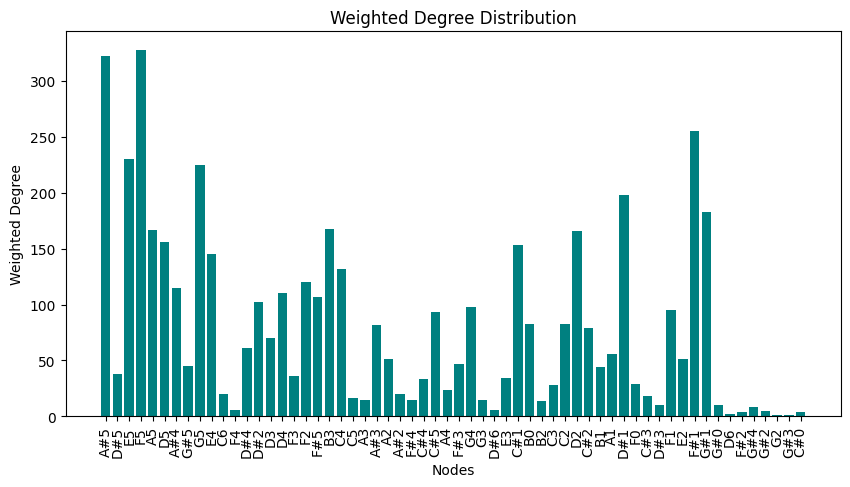

Degree Centrality: {'F5': 0.8305084745762712, 'A#5': 0.7966101694915254, 'D5': 0.7288135593220338, 'E5': 0.6949152542372882, 'A5': 0.6610169491525424, 'G5': 0.6440677966101694, 'D#1': 0.6271186440677966, 'B3': 0.6101694915254238, 'C4': 0.6101694915254238, 'F#5': 0.5932203389830508, 'F2': 0.559322033898305, 'C#1': 0.559322033898305, 'F#1': 0.559322033898305, 'E4': 0.5423728813559322, 'C#5': 0.5254237288135594, 'D2': 0.5254237288135594, 'D4': 0.4745762711864407, 'A#4': 0.4576271186440678, 'D#2': 0.4576271186440678, 'F1': 0.4576271186440678, 'G#1': 0.4576271186440678, 'D3': 0.4406779661016949, 'G4': 0.4406779661016949, 'A#3': 0.423728813559322, 'C2': 0.3898305084745763, 'A2': 0.3728813559322034, 'D#4': 0.3389830508474576, 'F#3': 0.3389830508474576, 'B0': 0.3389830508474576, 'D#5': 0.3220338983050847, 'G#5': 0.3220338983050847, 'C#2': 0.3220338983050847, 'A1': 0.3220338983050847, 'F0': 0.3220338983050847, 'E2': 0.3220338983050847, 'F3': 0.3050847457627119, 'E3': 0.288135593220339, 'C#4': 0

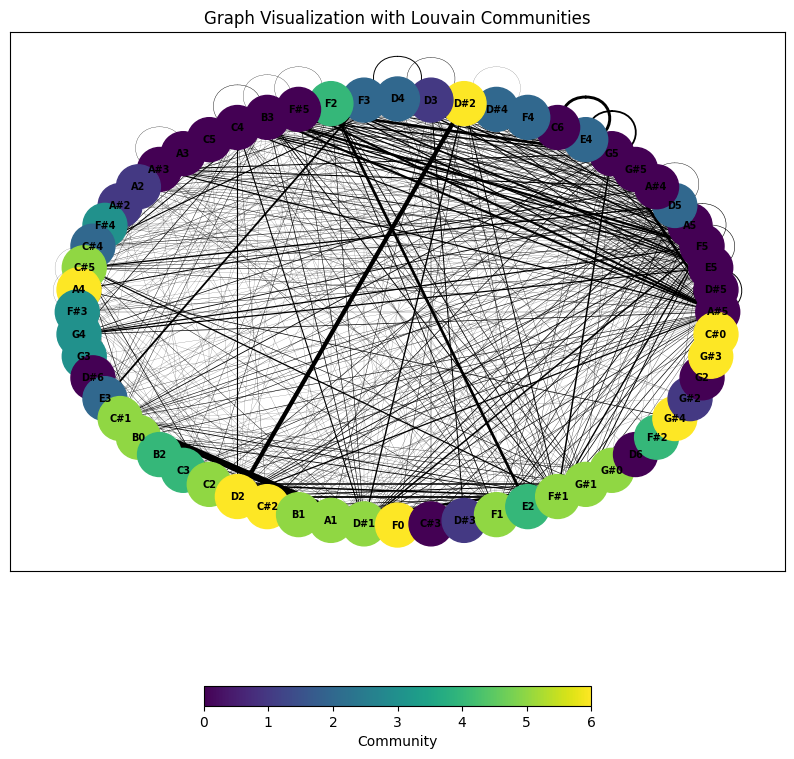

Louvain Communities: [{'B3', 'C#3', 'A#5', 'C4', 'A5', 'A#3', 'A#4', 'F5', 'C5', 'D#6', 'F#5', 'C6', 'A3', 'D#5', 'E5', 'G#5', 'G5', 'G2', 'D6'}, {'G#2', 'A2', 'A#2', 'D3', 'D#3'}, {'D5', 'F4', 'D4', 'F3', 'E4', 'D#4', 'C#4', 'E3'}, {'G3', 'G4', 'F#4', 'F#3'}, {'F2', 'E2', 'B2', 'F#2', 'C3'}, {'F1', 'A1', 'B1', 'C2', 'C#1', 'G#0', 'D#1', 'C#5', 'B0', 'G#1', 'F#1'}, {'C#2', 'A4', 'D#2', 'G#4', 'C#0', 'D2', 'F0', 'G#3'}]


In [ ]:
analyze_graph(G9)

In [ ]:
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def fitness(G1, p):
    # Plot settings for clearer visibility
    plt.rcParams.update({'figure.figsize': (8, 6), 'axes.labelsize': 'large', 'axes.titlesize': 'large'})

    # Power Law Fit
    degree_val = [deg for _, deg in G1.degree()]
    fit = powerlaw.Fit(degree_val, discrete=True)
    gamma = fit.power_law.alpha
    plt.figure()
    fit.power_law.plot_pdf(color='brown', linestyle='dotted', label=f'Fit ccdf at gamma={gamma:.2f}')
    fit.plot_pdf(color='black')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Power Law Distribution Fit')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f'Gamma= {gamma:.2f}, sigma= {fit.power_law.sigma:.2f}')

    # Poisson Fit
    degrees = [deg for node, deg in G1.degree()]
    mu = np.mean(degrees)
    poisson_pmf = poisson.pmf(np.arange(max(degrees) + 1), mu)
    observed_counts, _ = np.histogram(degrees, bins=np.arange(max(degrees) + 2), density=True)
    plt.figure()
    plt.bar(range(len(observed_counts)), observed_counts, label='Observed', alpha=0.5)
    plt.plot(range(len(poisson_pmf)), poisson_pmf, color='red', linestyle='dotted', label='Poisson Fit')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Poisson Distribution Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ER Fit
    n = G1.number_of_nodes()
    m = G1.number_of_edges()
    expected_m = n * (n - 1) / 2 * p
    plt.figure()
    plt.hist([G1.degree(node) for node in G1.nodes()], bins=range(max([G1.degree(node) for node in G1.nodes()]) + 2), density=True, alpha=0.5, label='Observed')
    plt.axvline(expected_m / n, color='red', linestyle='dotted', label=f'ER Expected Mean Degree: {expected_m / n:.2f}')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('ER Model Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

Calculating best minimal value for power law fit


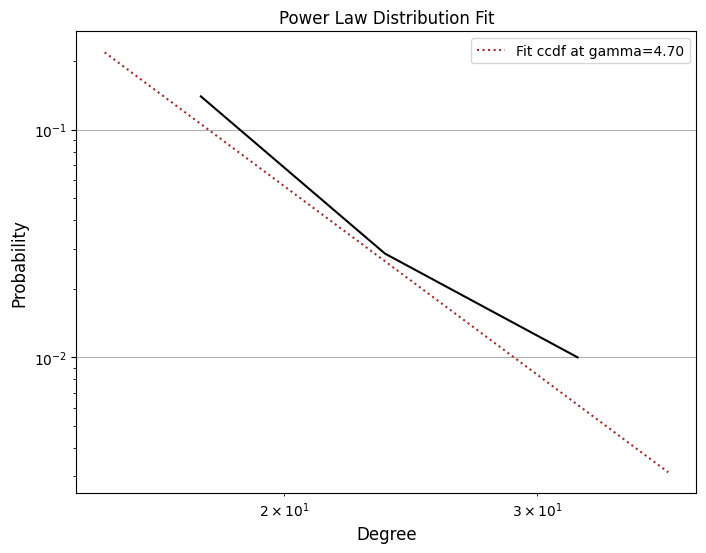

Gamma= 4.70, sigma= 1.17


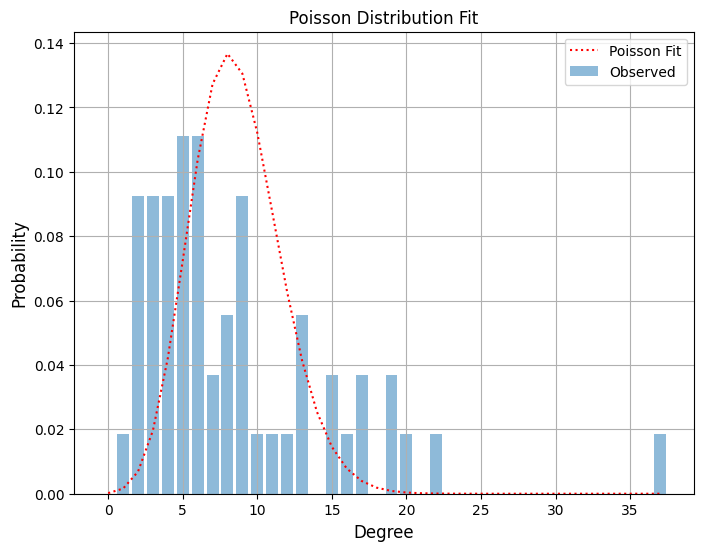

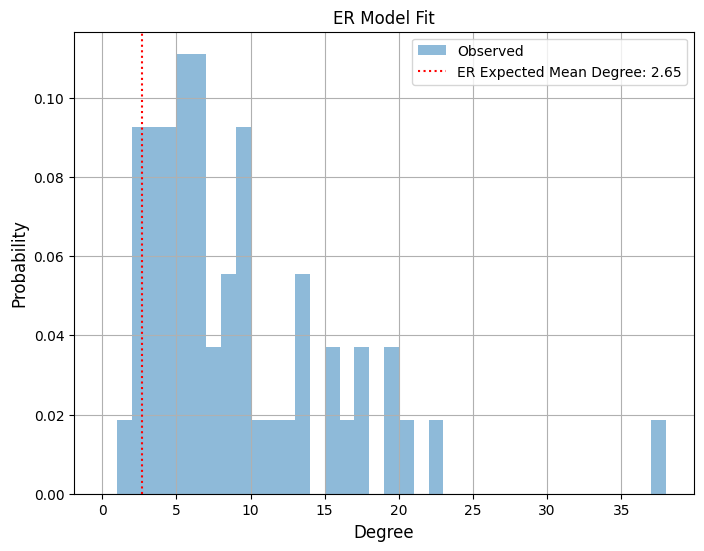

In [ ]:
fitness(G1, 0.1)

Calculating best minimal value for power law fit


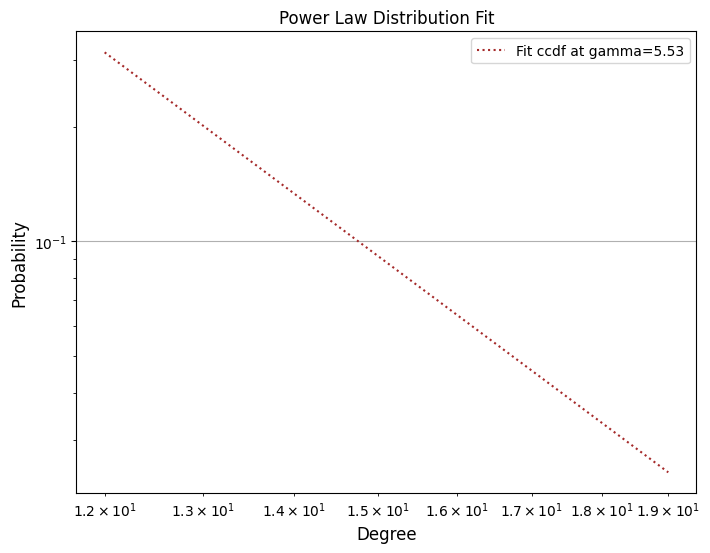

Gamma= 5.53, sigma= 1.07


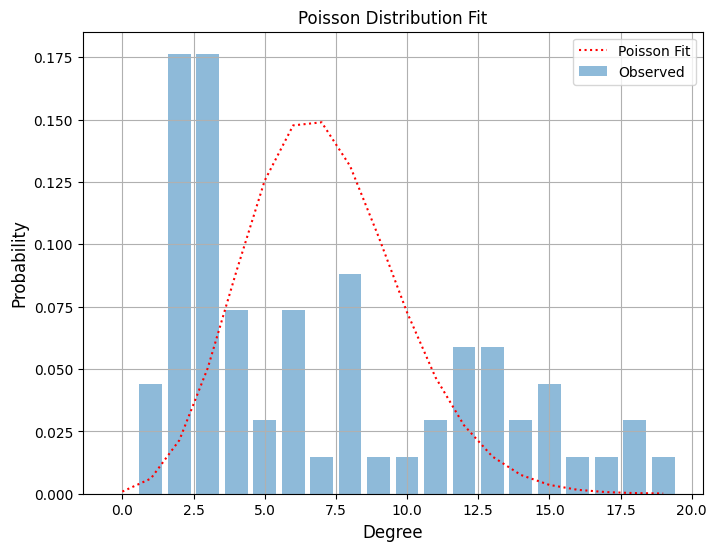

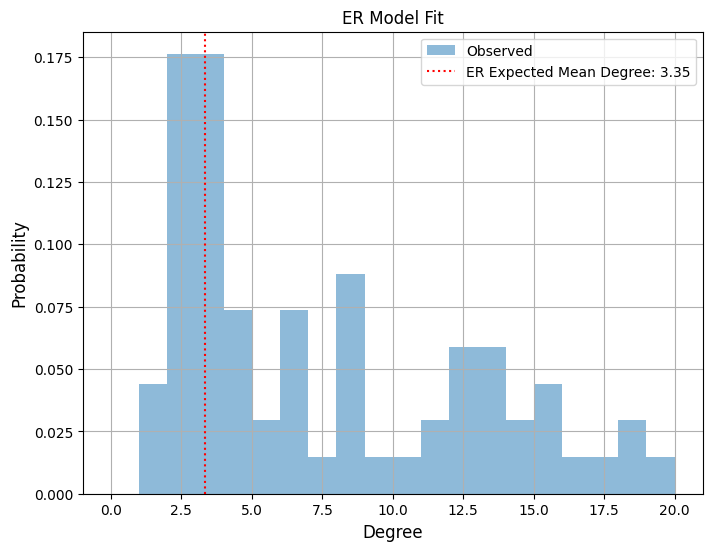

In [ ]:
fitness(G2, 0.1)

Calculating best minimal value for power law fit


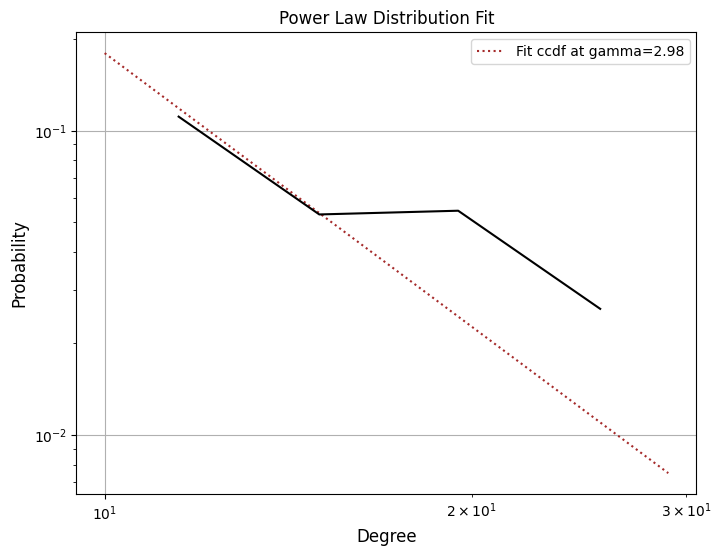

Gamma= 2.98, sigma= 0.35


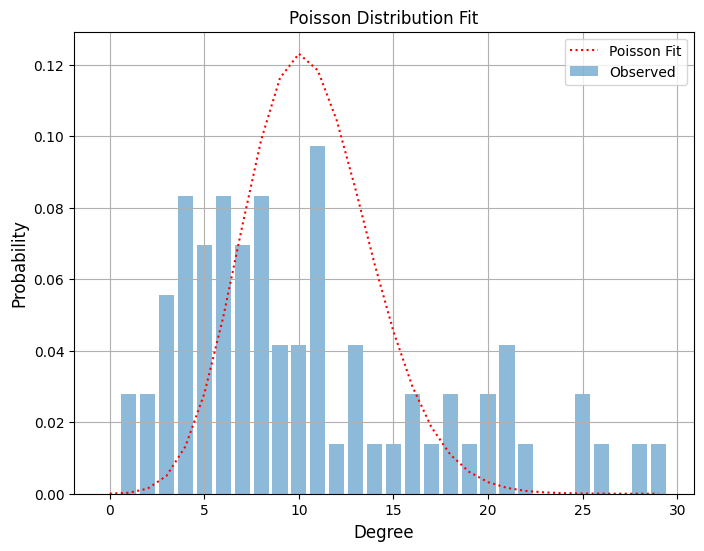

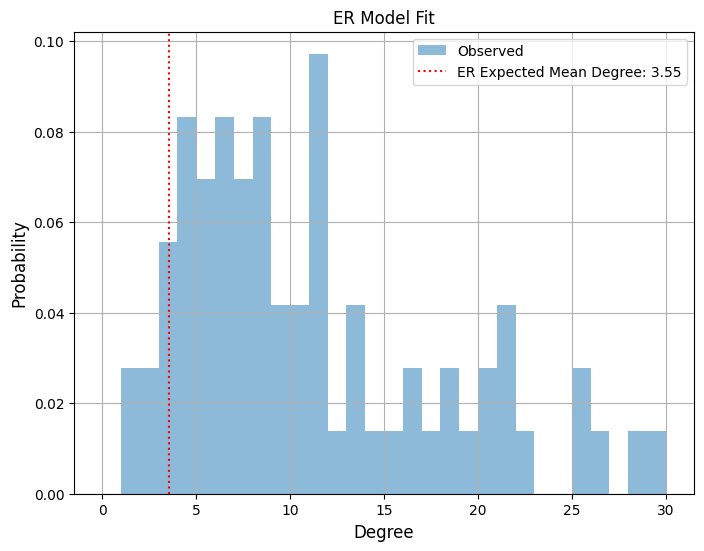

In [ ]:
fitness(G3, 0.1)

Calculating best minimal value for power law fit


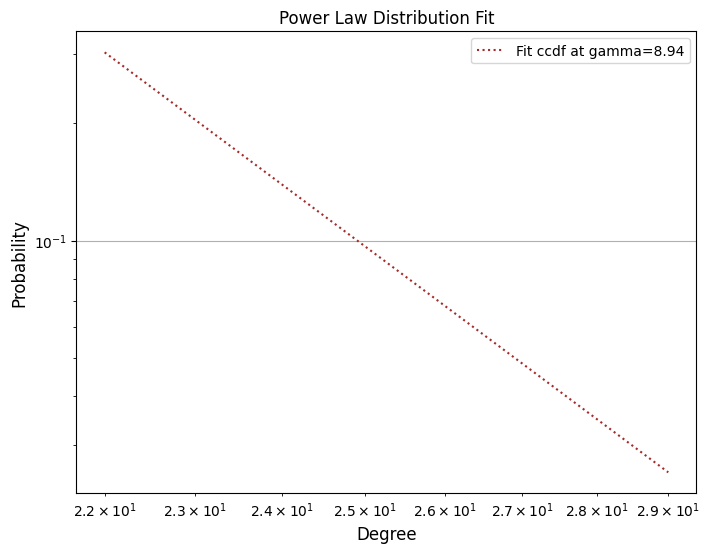

Gamma= 8.94, sigma= 2.51


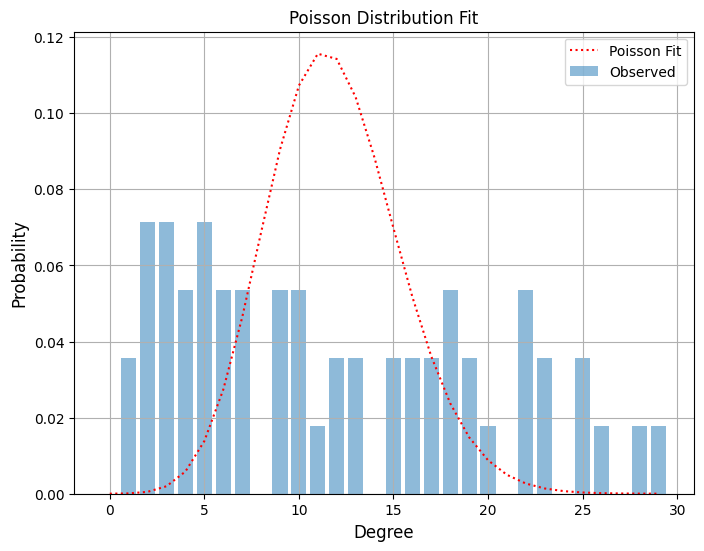

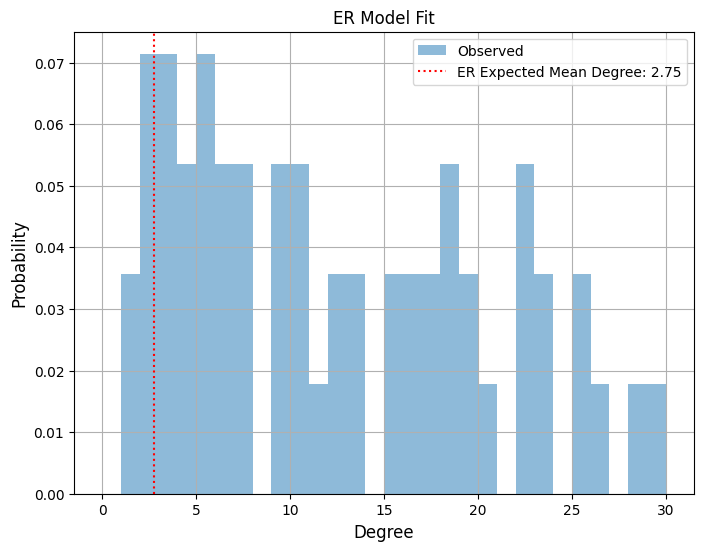

In [ ]:
fitness(G4, 0.1)

Calculating best minimal value for power law fit


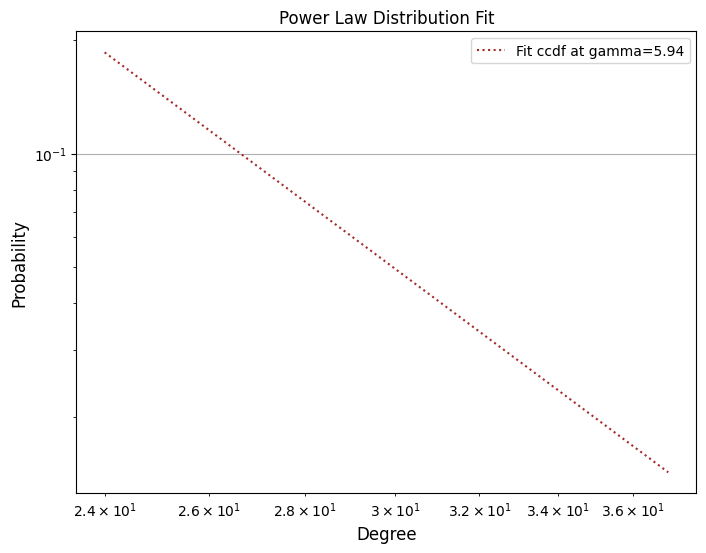

Gamma= 5.94, sigma= 1.32


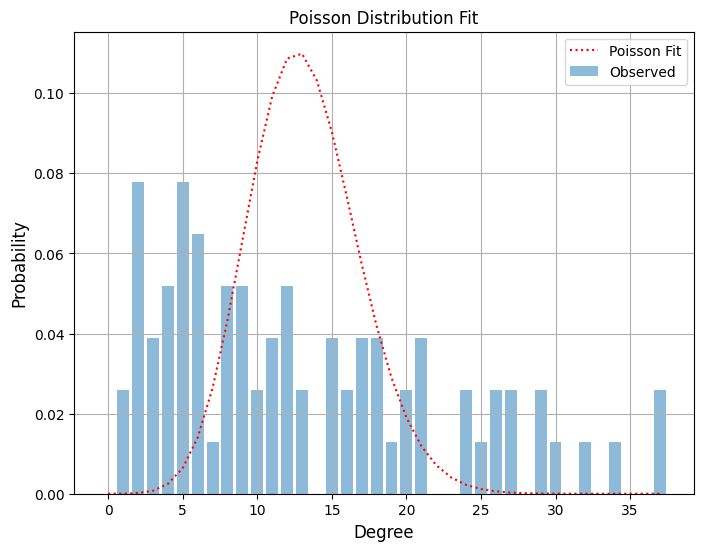

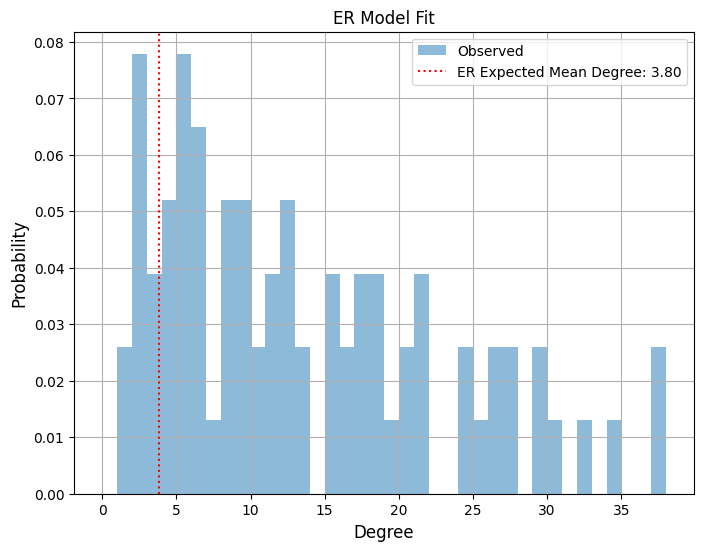

In [ ]:
fitness(G5, 0.1)

Calculating best minimal value for power law fit


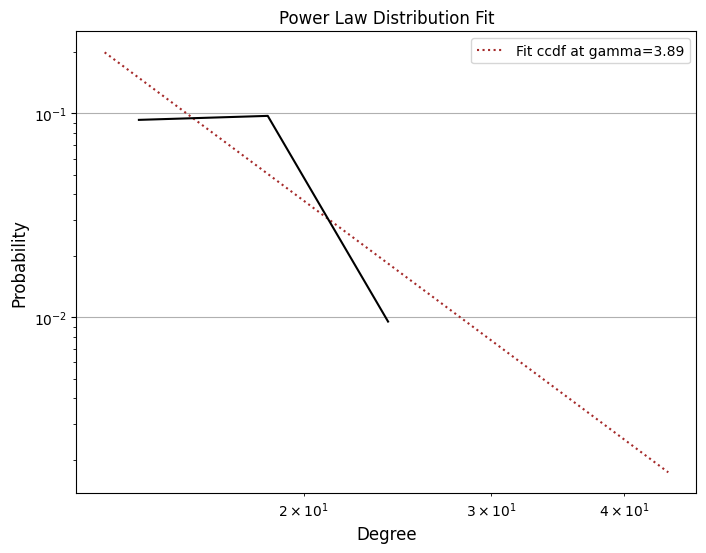

Gamma= 3.89, sigma= 0.49


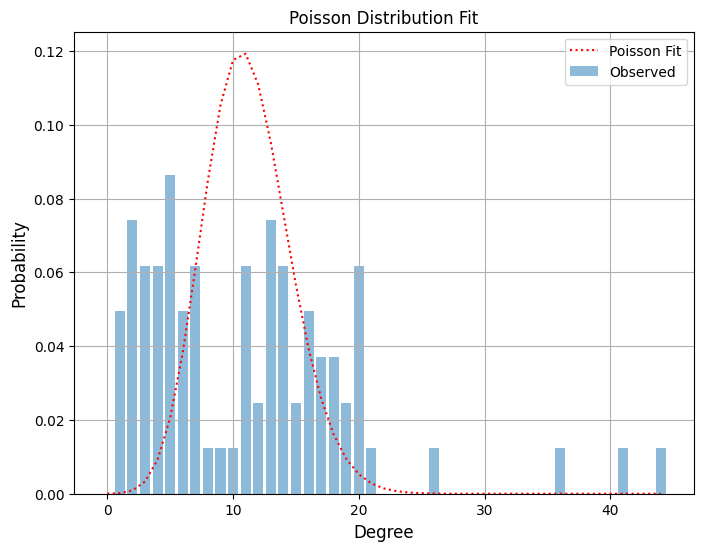

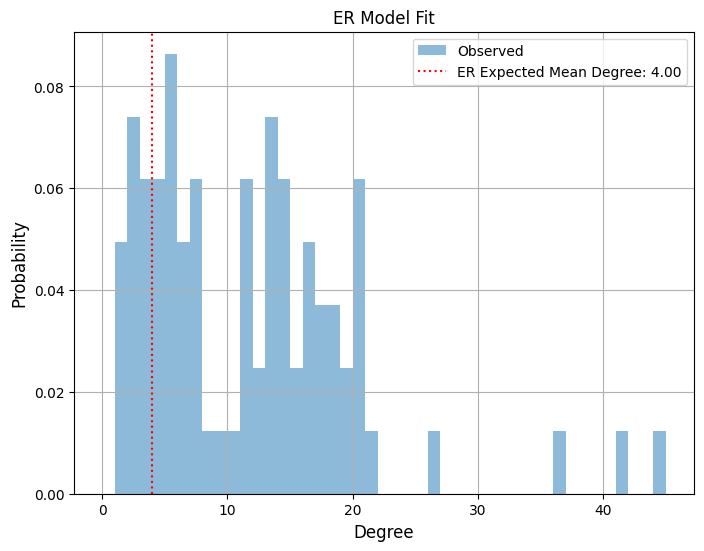

In [ ]:
fitness(G6, 0.1)

Calculating best minimal value for power law fit


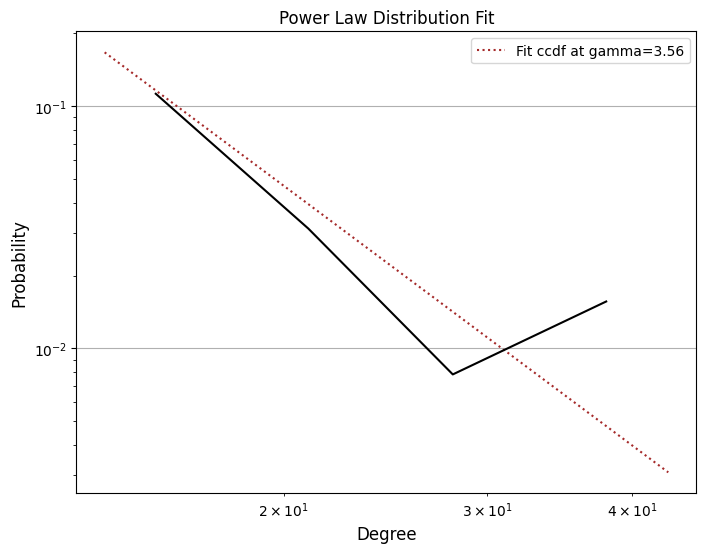

Gamma= 3.56, sigma= 0.64


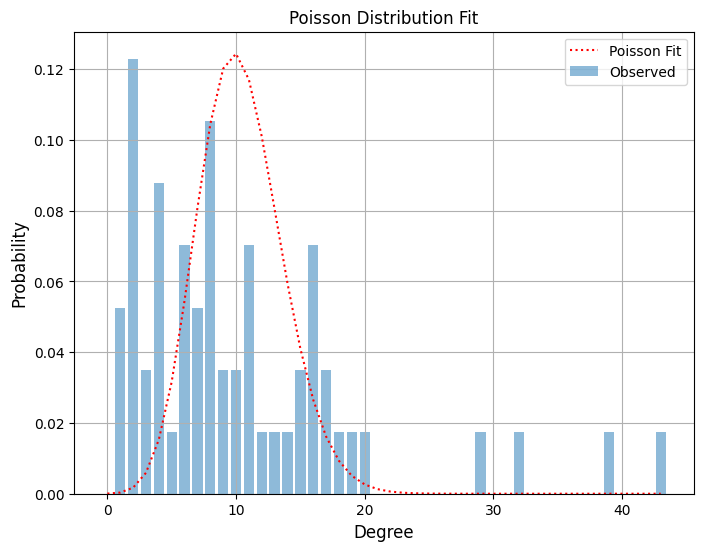

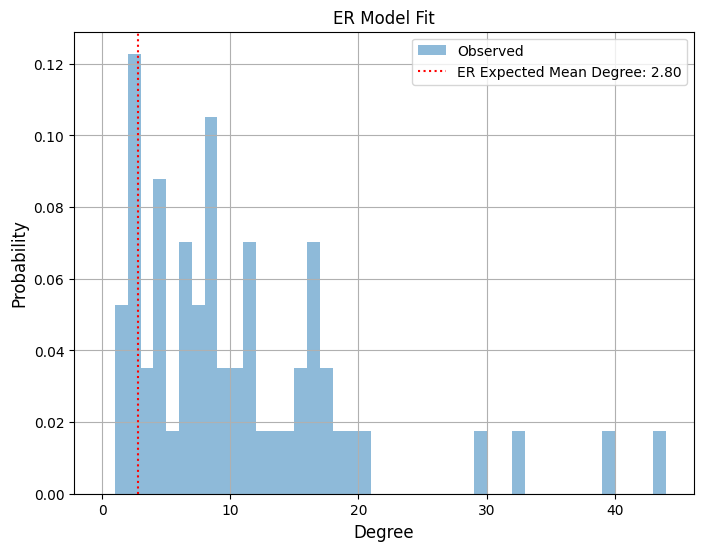

In [ ]:
fitness(G7, 0.1)

Calculating best minimal value for power law fit


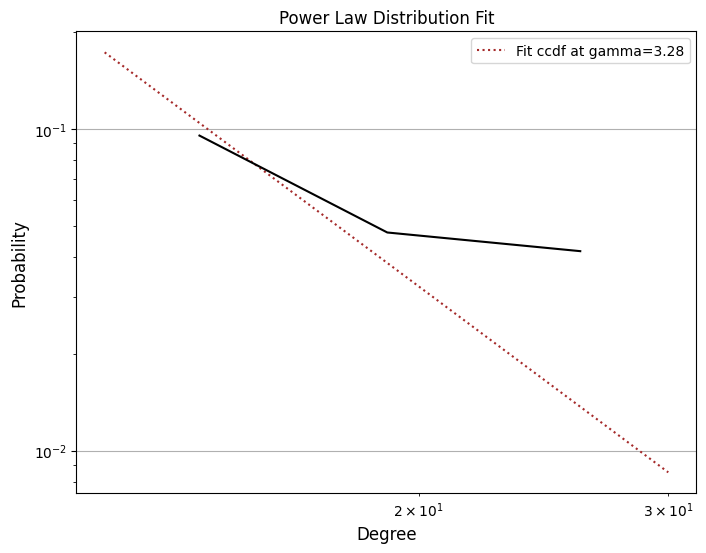

Gamma= 3.28, sigma= 0.50


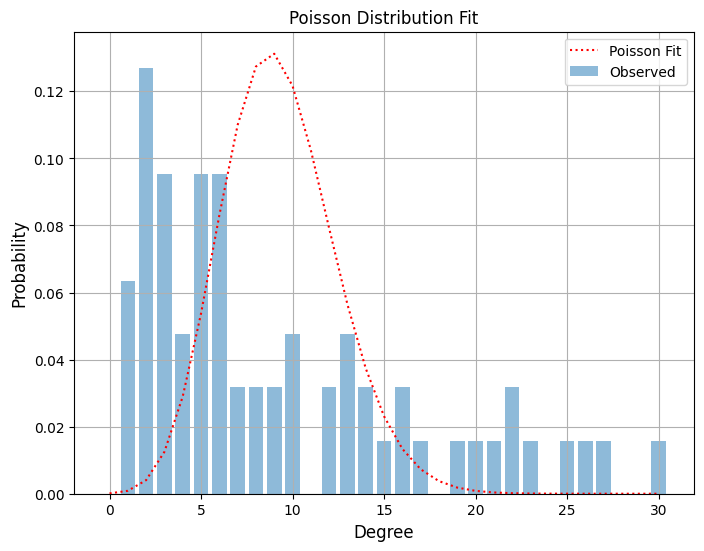

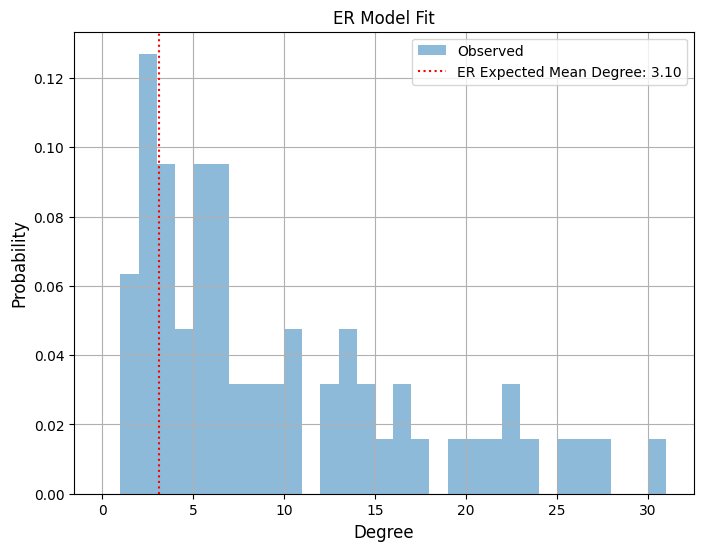

In [ ]:
fitness(G8, 0.1)

Calculating best minimal value for power law fit


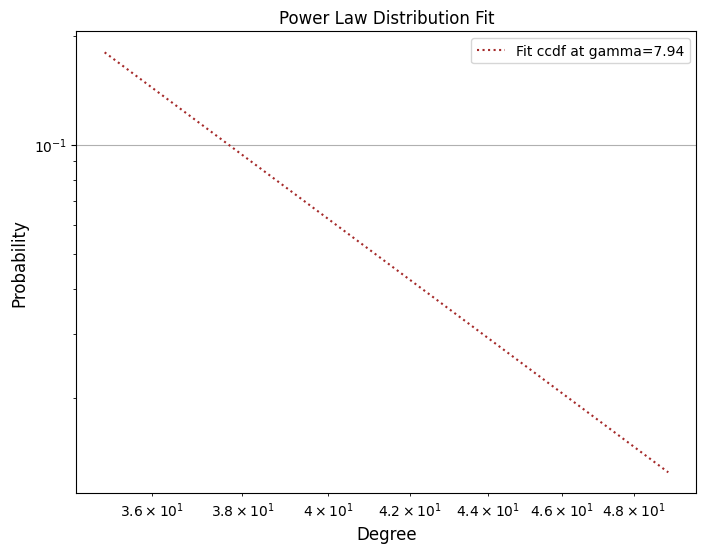

Gamma= 7.94, sigma= 2.19


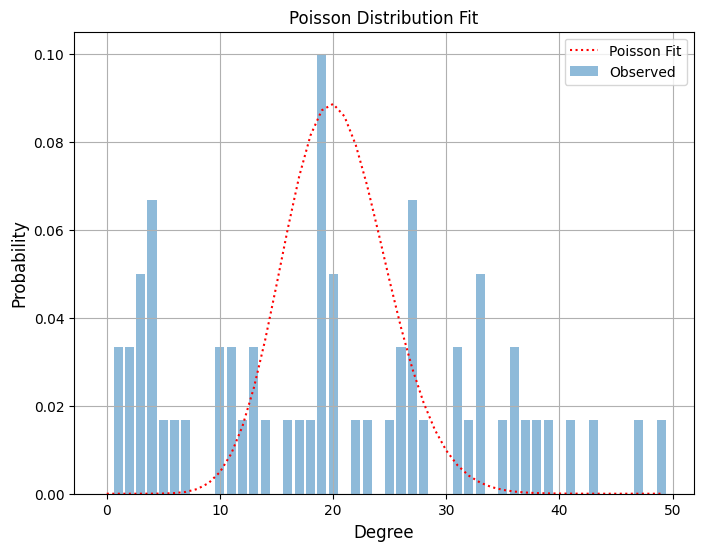

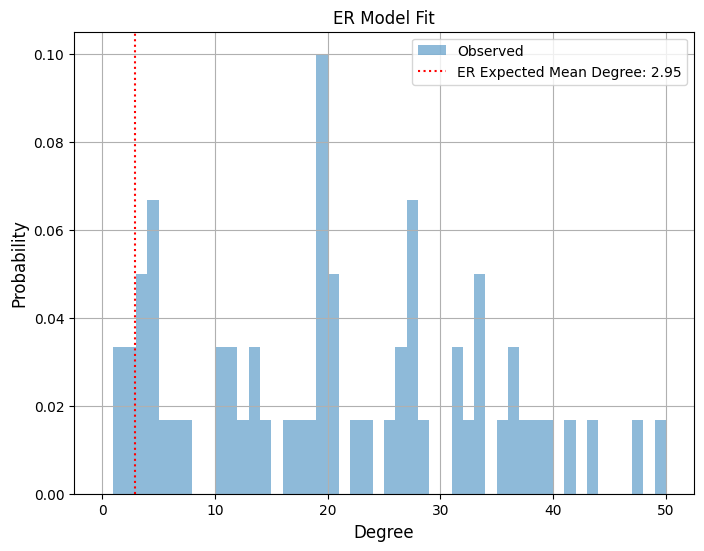

In [ ]:
fitness(G9, 0.1)